# Comparing PNECs and SCLC archetypes

PNECs are like generalists that complete many different tasks sub-optimally. If each tumor cell can specialize in a single PNEC task, overall the tumor’s “group phenotypic composition” is more fit than if each individual cell tried to do all tasks. Because these are cancer cells, they are also more plastic than normal differentiated cells and are therefore better able to trade off tasks to increase the fitness of the whole tumor when appropriate.

1. Use GO terms corresponding to PNEC tasks to show that PNECs are marginally enriched in all of them, whereas different SCLC phenotypes are strongly enriched in a subset
2. Can this explain why a more heterogeneous tumor can better respond to treatment?

Do PNECs fall in an archetype space? Let's try to see if they DO have different tasks they optimize. If not, my guess is that its because they are doing multiple tasks ("suboptimally") until they acquire mutations that allow them to increase in fitness as cancer cells.

In [1]:
import scvelo as scv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [27]:
pnec = pd.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/NE_stem/GSE136580_YO_MAK_082619_tpmTranscripts_withoutERCCs.txt',
                   sep = '\t', index_col = 0, header = 0)

In [28]:
pnec.index = [i.split(':')[0].upper() for i in pnec.index]

In [17]:
pnec_clusters = pd.read_table('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/NE_stem/metadata_cleaned.tsv', sep = '\t', index_col = 1)

In [18]:
pnec_clusters

I.D. Lineage label  Initial  Final   \
Long format cell I.D.                                                      
A4_C49_022114_S5                        1     Ascl1 (+)        1      12   
A6_C51_022114_S3                        2     Ascl1 (+)        1       2   
E9_C30_022114_S1                        3     Ascl1 (+)        1      17   
A9_C04_021715_IL6202_N701_N503_S4       5     Ascl1 (+)        1       1   
C9_C16_021715_IL6202_N702_N501_S1       6     Ascl1 (+)        2       2   
...                                   ...           ...      ...     ...   
F9_C36_012015_IL6205_N706_N505_S45    243      Lyz2 (−)        5       5   
G10_C90_012015_IL6205_N706_N508_S50   244      Lyz2 (−)        3       3   
G9_C42_012015_IL6205_N706_N507_S48    245      Lyz2 (−)        5       5   
H1_C43_012015_IL6205_N707_N501_S40    246      Lyz2 (−)        3       3   
H9_C48_012015_IL6205_N707_N502_S42    247      Lyz2 (−)        5       5   

                                         cluster  
Long format cell I.D.                             
A4_C49_022114_S5                     NE_ciliated  
A6_C51_022114_S3                              NE  
E9_C30_022114_S1                              NE  
A9_C04_021715_IL6202_N701_N503_S4             NE  
C9_C16_021715_IL6202_N702_N501_S1             NE  
...                                          ...  
F9_C36_012015_IL6205_N706_N505_S45      ciliated  
G10_C90_012015_IL6205_N706_N508_S50         club  
G9_C42_012015_IL6205_N706_N507_S48      ciliated  
H1_C43_012015_IL6205_N707_N501_S40          club  
H9_C48_012015_IL6205_N707_N502_S42      ciliated  

[225 rows x 5 columns]

# CXCR4 and NEUROD1 in PNECs

In [19]:
pnec_clusters['CXCL12'] = pnec.loc['CXCL12'].mean()
pnec_clusters['CXCR4'] = pnec.loc['CXCR4']

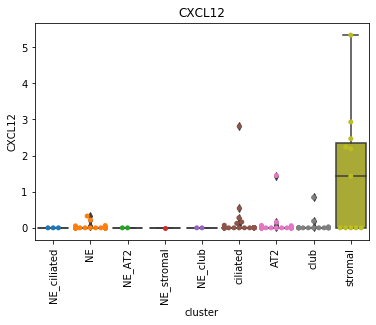

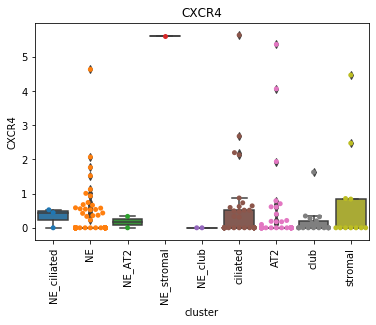

In [20]:
import seaborn as sns
gene = 'CXCL12'
def plot_box(gene):
    plt.figure(figsize=(6,4))
    # pnec_clusters[gene] = pnec.loc[gene]
    sns.boxplot(data = pnec_clusters, x = 'cluster', y = gene)
    sns.swarmplot(data = pnec_clusters, x = 'cluster', y = gene)
    plt.title(gene)
    plt.xticks(rotation = 90)
    plt.show()
plot_box(gene)
plot_box('CXCR4')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

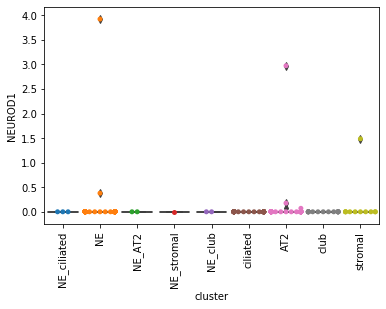

In [21]:
plt.figure(figsize=(6,4))
pnec_clusters['NEUROD1'] = pnec.loc['NEUROD1']
sns.boxplot(data = pnec_clusters, x = 'cluster', y = 'NEUROD1')
sns.swarmplot(data = pnec_clusters, x = 'cluster', y = 'NEUROD1')

plt.xticks(rotation = 90)

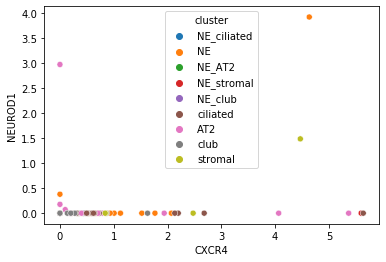

In [22]:
sns.scatterplot(x = pnec_clusters['CXCR4'], y = pnec_clusters['NEUROD1'], hue = pnec_clusters['cluster'])

# Transit amplifying cell signature vs. SCLC-Y

# Using bulk SCLC and upregulated genes

In [243]:
import os.path as op
outdir = '/Users/smgroves/Dropbox (VU Basic Sciences)/pycharm_workspace/mazebox/mazebox/examples/notebooks/bulk/'
data = pd.read_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T

In [244]:
gene_all = pd.read_csv('./arc_space/Supplemental Table 5_enriched genes.csv', header = 0, index_col = None)


In [245]:
gene_pval = gene_all.pivot(index = 'Feature Name', columns='archetype #', values = 'P value (Mann-Whitney)')


In [246]:
gene_pval.sort_values(4)

archetype #              1         2   3             4         5
Feature Name                                                    
RAB20                  NaN       NaN NaN  1.987300e-07       NaN
CLNK                   NaN       NaN NaN  2.512200e-07       NaN
LRRIQ4                 NaN       NaN NaN  2.757800e-07       NaN
IL17REL                NaN       NaN NaN  2.889100e-07       NaN
CNKSR3                 NaN       NaN NaN  3.026400e-07       NaN
...                    ...       ...  ..           ...       ...
ZW10                   NaN  0.019739 NaN           NaN       NaN
ZWILCH        8.794400e-03       NaN NaN           NaN       NaN
ZYG11A        9.256000e-03       NaN NaN           NaN       NaN
ZYG11B                 NaN       NaN NaN           NaN  0.003337
ZYX           2.757800e-07       NaN NaN           NaN       NaN

[7564 rows x 5 columns]

In [42]:
gene_all.loc[gene_all['archetype #']==3]

archetype # Feature Name  P value (Mann-Whitney)  Median Difference  \
4399            3      PPP1R17            2.170200e-06           7.230200   
4400            3      NEUROD1            1.725000e-07           6.984300   
4401            3          MYC            4.171600e-03           5.654100   
4402            3          ELN            5.066400e-04           5.500900   
4403            3        CERKL            2.287900e-07           5.208500   
...           ...          ...                     ...                ...   
6249            3        KCNG4            6.431700e-03           0.004214   
6250            3         SPZ1            1.282000e-02           0.003859   
6251            3      HSD11B1            2.268000e-02           0.002758   
6252            3        BANF2            1.132600e-02           0.000476   
6253            3        CIDEA            1.839800e-02           0.000211   

      Mean Difference  Significant after Benjamini-Hochberg correction?  \
4399         4.985000                                                 1   
4400         5.842100                                                 1   
4401         3.000200                                                 1   
4402         3.123900                                                 1   
4403         4.256300                                                 1   
...               ...                                               ...   
6249         0.319500                                                 1   
6250         0.154210                                                 1   
6251         0.013093                                                 1   
6252         0.247010                                                 1   
6253         0.037407                                                 1   

      Is first bin maximal?  
4399                      1  
4400                      1  
4401                      1  
4402                      1  
4403                      1  
...                     ...  
6249                      1  
6250                      1  
6251                      1  
6252                      1  
6253                      1  

[1855 rows x 7 columns]

In [43]:
# gene_pval.loc[np.isfinite(gene_pval.sort_values(4)).loc[np.isfinite(gene_pval.sort_values(4))[4]==True].index]

# GOSemSim tSNE plot on PNECs compared to SCLC Subtypes

In [23]:
# !git clone https://github.com/LoLab-VU/magine
# !cd magine
# !pip install -r requirements.txt
# !export PYTHONPATH=`pwd`:$PYTHONPATH

In [24]:
# from magine.enrichment.enrichr import Enrichr


In [29]:
import anndata
pnec_ad = anndata.AnnData(pnec.T)
pnec_ad.var_names_make_unique()
pnec_ad.obs['cluster'] = pnec_clusters['cluster']                  

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [33]:
sc.pp.filter_genes(pnec_ad, min_cells=3)

In [34]:
sc.pp.normalize_total(pnec_ad, target_sum=1e4)


In [35]:
sc.pp.log1p(pnec_ad)


In [36]:
NE_clust = []
for i in pnec_ad.obs_names:
    if pnec_clusters.loc[i]['cluster'] in ['NE_ciliated','NE_AT2','NE_club','NE_stromal']:
        NE_clust.append('TA')
    elif pnec_clusters.loc[i]['cluster'] == 'NE':
        NE_clust.append("NE")
    else: NE_clust.append("Non-NE")

In [37]:
pnec_ad.obs['NE_cluster'] = NE_clust
pnec_ad.var_names = [i.split(':')[0] for i in pnec_ad.var_names]


... storing 'cluster' as categorical
... storing 'NE_cluster' as categorical


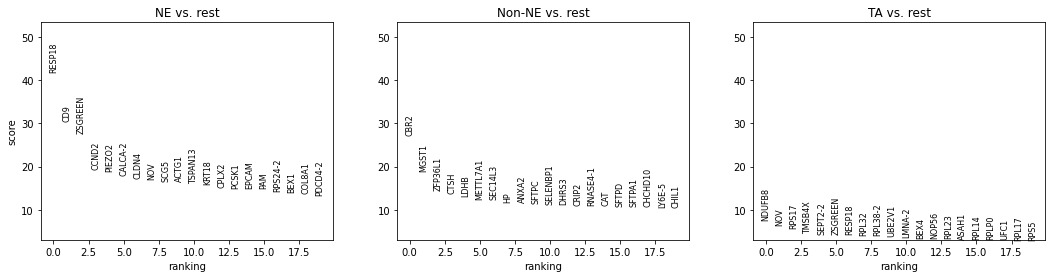

In [38]:
sc.tl.rank_genes_groups(pnec_ad, groupby='NE_cluster')
sc.pl.rank_genes_groups(pnec_ad)

In [43]:
# [print(i.split('-')[0]) for i in list(pnec_ad.uns['rank_genes_groups']['names']['TA'])[:400]]


In [29]:
ne_enrich = sc.queries.enrich(pnec_ad, "NE", org='mmusculus', gprofiler_kwargs={'sources':['GO:BP'],'all_results':True})

In [30]:
ne_enrich.loc[ne_enrich['significant']==True]

source      native                                               name  \
0   GO:BP  GO:0006518                          peptide metabolic process   
1   GO:BP  GO:0043603                   cellular amide metabolic process   
2   GO:BP  GO:0043604                         amide biosynthetic process   
3   GO:BP  GO:0043043                       peptide biosynthetic process   
4   GO:BP  GO:0006412                                        translation   
5   GO:BP  GO:1901564          organonitrogen compound metabolic process   
6   GO:BP  GO:0044267                 cellular protein metabolic process   
7   GO:BP  GO:1901566       organonitrogen compound biosynthetic process   
8   GO:BP  GO:0019538                          protein metabolic process   
9   GO:BP  GO:0007017                          microtubule-based process   
10  GO:BP  GO:0006928          movement of cell or subcellular component   
11  GO:BP  GO:0006749                      glutathione metabolic process   
12  GO:BP  GO:0071704                organic substance metabolic process   
13  GO:BP  GO:0044237                         cellular metabolic process   
14  GO:BP  GO:0006807                nitrogen compound metabolic process   
15  GO:BP  GO:0008152                                  metabolic process   
16  GO:BP  GO:0006575     cellular modified amino acid metabolic process   
17  GO:BP  GO:0006790                  sulfur compound metabolic process   
18  GO:BP  GO:0044238                          primary metabolic process   
19  GO:BP  GO:0120036  plasma membrane bounded cell projection organi...   
20  GO:BP  GO:0030030                       cell projection organization   
21  GO:BP  GO:0007018                         microtubule-based movement   
22  GO:BP  GO:0034641       cellular nitrogen compound metabolic process   
23  GO:BP  GO:0051128      regulation of cellular component organization   
24  GO:BP  GO:0098660              inorganic ion transmembrane transport   
25  GO:BP  GO:0016043                    cellular component organization   

         p_value  significant  \
0   1.262233e-27         True   
1   2.185505e-27         True   
2   3.745434e-22         True   
3   4.452167e-22         True   
4   8.635260e-22         True   
5   6.587912e-13         True   
6   1.617450e-11         True   
7   2.756295e-11         True   
8   1.250926e-08         True   
9   8.838049e-07         True   
10  2.893532e-05         True   
11  5.047417e-05         True   
12  7.676371e-05         True   
13  1.161668e-04         True   
14  3.683622e-04         True   
15  5.921329e-04         True   
16  8.860902e-04         True   
17  2.761414e-03         True   
18  3.372262e-03         True   
19  4.157860e-03         True   
20  4.157860e-03         True   
21  1.220257e-02         True   
22  1.783752e-02         True   
23  3.209206e-02         True   
24  4.336059e-02         True   
25  4.879067e-02         True   

                                          description  term_size  query_size  \
0   "The chemical reactions and pathways involving...        326         810   
1   "The chemical reactions and pathways involving...        362         810   
2   "The chemical reactions and pathways resulting...        283         810   
3   "The chemical reactions and pathways resulting...        277         810   
4   "The cellular metabolic process in which a pro...        273         810   
5   "The chemical reactions and pathways involving...       2321         810   
6   "The chemical reactions and pathways involving...       1460         810   
7   "The chemical reactions and pathways resulting...        558         810   
8   "The chemical reactions and pathways involving...       1941         810   
9   "Any cellular process that depends upon or alt...        214         810   
10  "The directed, self-propelled movement of a ce...        189         810   
11  "The chemical reactions and pathways involving...         42         810   
12  "The chemical 

In [43]:
df = pd.DataFrame(index=["PNEC_Krasnow/PNEC",'PNEC_Krasnow/TA','PNEC_Krasnow/Non-NE','SCLC-A_arc','SCLC-A2_arc','SCLC-N_arc',
                         'SCLC-P_arc','SCLC-Y_arc','terms','ont','name','level'])

categories = {'b':'BP','c':'CL','m':'MF'}

for m in df.index[:-4]:
    indf = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/%s_ontology.tab"%m, delimiter="\t")
#    indf = indf.loc[indf['q-value'] < 0.05]
    for i in indf.index:
        goid = indf.loc[i,'term_goid']
        if goid not in df.columns:
            df[goid]=1 #changed from False
            df.loc['ont',goid]= categories[indf.loc[i,'term_category']]
            df.loc['name',goid]= indf.loc[i,'term_name']
            df.loc['level',goid]= indf.loc[i,'term_level']
            df.loc['terms',goid]= indf.loc[i,'members_input_overlap_geneids']

        df.loc[m,goid]=indf.loc[i,'p-value'] #changed from True
        



df = df.transpose()
df.to_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/pnec_krasnow_sclc_go_phenotypes.csv")

In [54]:
top = df.loc[top_go]
top.index = top.name
(top[top.columns[3:8]])

SCLC-A_arc SCLC-A2_arc  \
name                                                                        
DNA-binding transcription factor activity, RNA ...        0.0           1   
DNA-binding transcription factor activity                 0.0           1   
nucleus                                                   0.0           1   
regulation of RNA metabolic process                       0.0           1   
DNA binding                                               0.0           1   
transcription, DNA-templated                              0.0           1   
regulation of nucleobase-containing compound me...        0.0           1   
RNA biosynthetic process                                  0.0           1   
regulation of gene expression                             0.0           1   
regulation of biosynthetic process                        0.0           1   
intrinsic component of membrane                             1    0.000004   
catalytic activity, acting on a glycoprotein                1    0.000005   
glycosylation                                               1    0.000008   
integral component of membrane                              1    0.000012   
macromolecule glycosylation                                 1    0.000018   
protein glycosylation                                       1    0.000018   
intrinsic apoptotic signaling pathway in respon...          1     0.00003   
positive regulation of cell adhesion mediated b...          1    0.000037   
protein O-linked glycosylation                              1    0.000075   
compartment pattern specification                           1    0.000076   
neuron part                                               0.0           1   
nervous system development                                0.0           1   
synaptic membrane                                           1           1   
presynapse                                                  1           1   
synaptic signaling                                          1           1   
postsynapse                                          0.000942           1   
trans-synaptic signaling                                    1           1   
anterograde trans-synaptic signaling                        1           1   
synapse organization                                        1           1   
regulation of multicellular organismal process              1    0.005974   
biosynthetic process                                 0.000043           1   
organic substance biosynthetic process               0.000053           1   
cellular biosynthetic process                        0.000015           1   
primary metabolic process                                   1           1   
organic substance metabolic process                         1           1   
intracellular part                                   0.000006           1   
intracellular                                        0.000008           1   
cellular metabolic process                                  1           1   
heterocyclic compound binding                        0.000024           1   
organic cyclic compound binding                      0.000014           1   
focal adhesion                                              1           1   
cell-substrate adherens junction                            1           1   
cell-substrate junction                                     1           1   
adherens junction                                           1           1   
anchoring junction                                          1           1   
vesicle                                                     1    0.000094   
cytoplasm                                                   1    0.000204   
cytoplasmic part                                            1     0.00042   
extracellular vesicle                                       1    0.001195   
extracellular organelle                                     1    0.001223   

                                              

In [44]:
top_go = []
for s in df.columns[3:8]:
    for go in df.sort_values(s)[0:10].index:
        top_go.append(go)

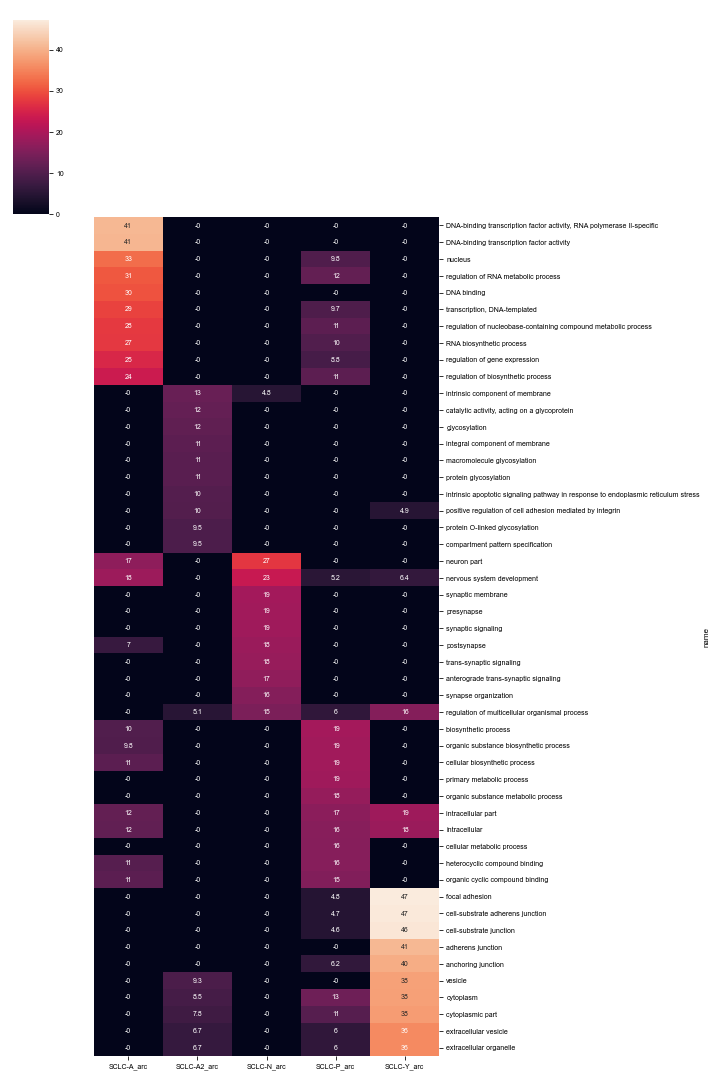

In [56]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

matplotlib.rc('font', **font)
top = df.loc[top_go]
top.index = top.name
top = -np.log(top[top.columns[3:8]].astype(float))
b = sns.clustermap(top,annot = True, col_cluster=False,row_cluster=False, figsize = (10,15), annot_kws = {'size':7})


**Use this dataframe in get_dissim.R and then in Plotly GO Maps.ipynb (or below)**

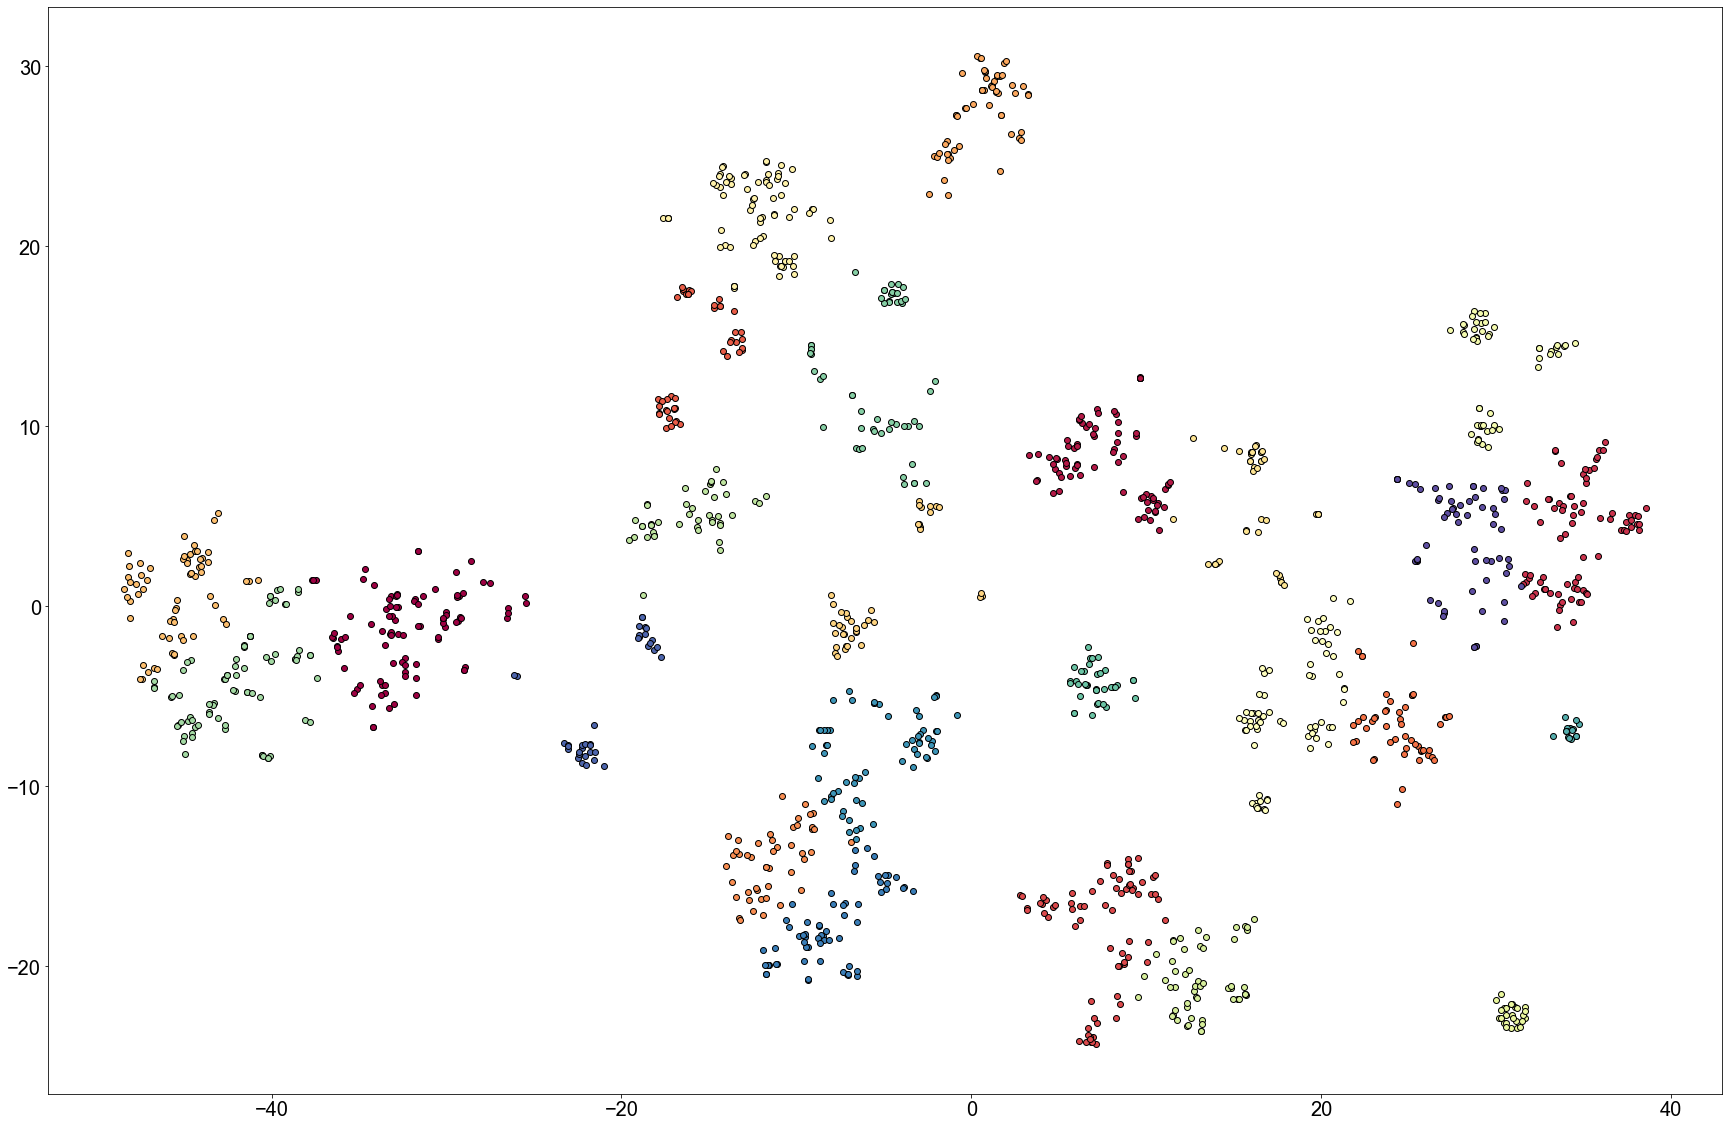

In [133]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AffinityPropagation
import plotly
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
import os.path as op
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import matplotlib
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans


np.random.seed(0)
font = {'weight' : 'normal',
        'family': 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

directory = "/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/"

#dissim = 1-pd.read_csv("../dist_all_rel.csv",index_col=0)
dissim = pd.read_csv(op.join(directory, "dist_all_rel_dendrogram_pnec_krasnow_sclc.csv"),index_col=0)
#dissim = 1-(dissim + dissim.transpose())

dissim = np.multiply(dissim, 1-np.eye(dissim.shape[0]))
dissim = np.power(dissim,6.)

go_phenotypes = pd.read_csv(op.join(directory, "pnec_krasnow_sclc_go_phenotypes.csv"),index_col=0)
go_phenotypes = go_phenotypes.loc[(go_phenotypes['level']>1) & (go_phenotypes['ont']=='BP')]


go_terms_to_keep = [i for i in dissim.index if dissim.loc[i].drop(i).std()>0] # GO terms with 0 distance to all other terms, or 1 distance to all other terms are dropped. The .drop(i) addresses the fact that terms with distance 1 from all others will still have distance 0 to themselves, which must be dropped prior to std
go_terms_to_keep = np.intersect1d(go_terms_to_keep, go_phenotypes.index)
go_phenotypes = go_phenotypes.loc[go_terms_to_keep]


dissim = dissim.loc[go_terms_to_keep, go_terms_to_keep]

t = TSNE(metric="precomputed",random_state=0, n_components = 2)
#t = MDS(dissimilarity="precomputed")
y = t.fit_transform(dissim)

ydf = pd.DataFrame(y, index=dissim.index, columns=['tsne%d'%(i+1) for i in range(t.n_components)])

db = KMeans(n_clusters=25).fit(ydf[['tsne1','tsne2']])
labels = db.labels_
    
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize = (30,20))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
#     plt.text(x.mean(),y.mean(), cluster_dict[k], size = 10, backgroundcolor = 'k', color = tuple(col))
plt.savefig('./out/tsne_pnec_krasnow_sclc_labeled.pdf')
    
bounds = np.zeros((t.n_components,2))
bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))

ydf['kmeans']=db.labels_
ydf['name'] = df.loc[ydf.index]['name']

# fig = plt.figure()
# # AP = AffinityPropagation()#preference = preference)
# # AP.fit(ydf)
# ax = fig.add_subplot(111)
# #kernel = density.plot_density(ydf, continuous=True, ax=ax, bounds=bounds[[0,1],:], scatter="all")
# ax.scatter(ydf['tsne1'],ydf['tsne2'],s=1,c='#CCAACC', edgecolor='k', linewidth=0.3)


# if False:
#     top_level_phenotypes = ydf.loc[[ydf.index[xxx] for xxx in AP.cluster_centers_indices_]]
#     top_level_phenotypes['name']=go_phenotypes.loc[top_level_phenotypes.index, 'name']


# #for i, pheno in enumerate(["green", "brown", "blue", "yellow", "turquoise", "black", "red", "midnightblue", "purple", "pink", "salmon"]):
# # for i, pheno in enumerate(["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft']):
# for i, pheno in enumerate(["SCLC-Y_arc"]):

#     go_terms = go_phenotypes.loc[(go_phenotypes[pheno]) & (go_phenotypes['ont'] == 'BP')].index
#     go_colors = []
#     for i in go_terms:
#         if go_phenotypes.loc[i]['NE'] == True:
#             if go_phenotypes.loc[i][:-3].astype('int').sum() > 2: go_colors.append('lightblue') #if more than just the current subtype and NE share this go term
#             else:
#                 go_colors.append('Blue') #just NE and this subtype share the go term
#         else: go_colors.append("Green") #just this subtype has the go term
#     enrichment = pd.read_csv(op.join(directory,"%s_ontology.tab" % pheno.lower()), delimiter="\t", index_col="term_goid").loc[go_terms]

#     ydf['term'] = pd.Series(['x']*len(ydf.index))
#     for i,r in ydf.iterrows():
#         ydf.loc[i,'term'] = go_phenotypes.loc[i, 'name']
    
#sns.scatterplot(x = ydf.loc[go_terms,'tsne1'],
#             y = ydf.loc[go_terms,'tsne2'],)
       

#     ydfsmall = ydf.loc[go_terms]
#     ydflarge = ydf.drop(go_terms)

#print('static')
# plt.savefig(op.join(directory, "PNEC_space.pdf"))
#raise ValueError("HOK")

In [134]:
ydf['kmeans']=db.labels_
ydf['name'] = df.loc[ydf.index]['name']

In [135]:
cluster_dict_krasnow = {0:"Transcription and translation",#
               1: "Immune system activation",# "DNA binding and transporter activity",
               2: "Angiogenesis, vasculogenesis, and cardiovascular system development", #"Stress response",
               3: "Vesicle fusion, mitochondrial and chromatin organization and membrane organization",#"Actin organization and migration",#"Metabolism",
               4: "ROS Response and Programmed Cell Death ",
               5: "Neuronal and neural development, morphogenesis, and differentiation", #
               6: "Ion transport and secretion" ,
               7: "Response to external stimulus (virus, nutrients, bacteria)", #"Secretion and homeostasis",
               8:"DNA replication, amino acid metabolism, RNA stability, drug catabolism", #"ROS-induced metabolic process and protein folding",
               9: "Blood circulation and hemostasis",
               10: "Mesoderm development and cytokine production (osteoblast differentiation, interferon and interleukin production, immune response)",
               11: "Response to cytokines, ions, drugs, and growth factors",
               12: "Cell morphogenesis and differentiation (including EMT, stem cell differentiation, and axon extension)",
               13: "Endocrine system development and epithelial cell differentiation (epithelium, kidney, muscle, liver)",
               14: "Cell-cell adhesion, cell adhesion to matrix/substrate", #'Cell cycle',
               15: "Cell-cell junction, synapse organization, and ECM organization",
               16: "Signaling in response to stimulus, cell communication (MAPK, Ras, NFkB, DNA damage response through P53)", #"Proliferation and division (including stem cell proliferation)",
               17:  "Biosynthesis and metabolism (lipid, alcohol, protein)",
               18: "Stress response, response to hypoxia, inflammatory response, DNA damage response, wound healing",
               19: "Chemotaxis, migration, cilium-dependent motility",
               20: "Symmetry, embryonic pattern formation (including neural tube, neural plate, cerebral cortex)",
                21: "Neurotransmitter and hormone secretion (including cell-cell signaling and homeostasis)",
                22: "RNA and protein localization, vesicle docking and fusion",#"Cognition, learning, and action potential conduction",
                23: "Cell cycle, meiosis/mitosis, transcription factor activity",
                24: "Embryonic development and morphogenesis", #"Electron transport, respiration, oxidative phosphorylation"
               }

In [136]:
# [print(i) for i in ydf.loc[ydf['kmeans']==24]['name']]

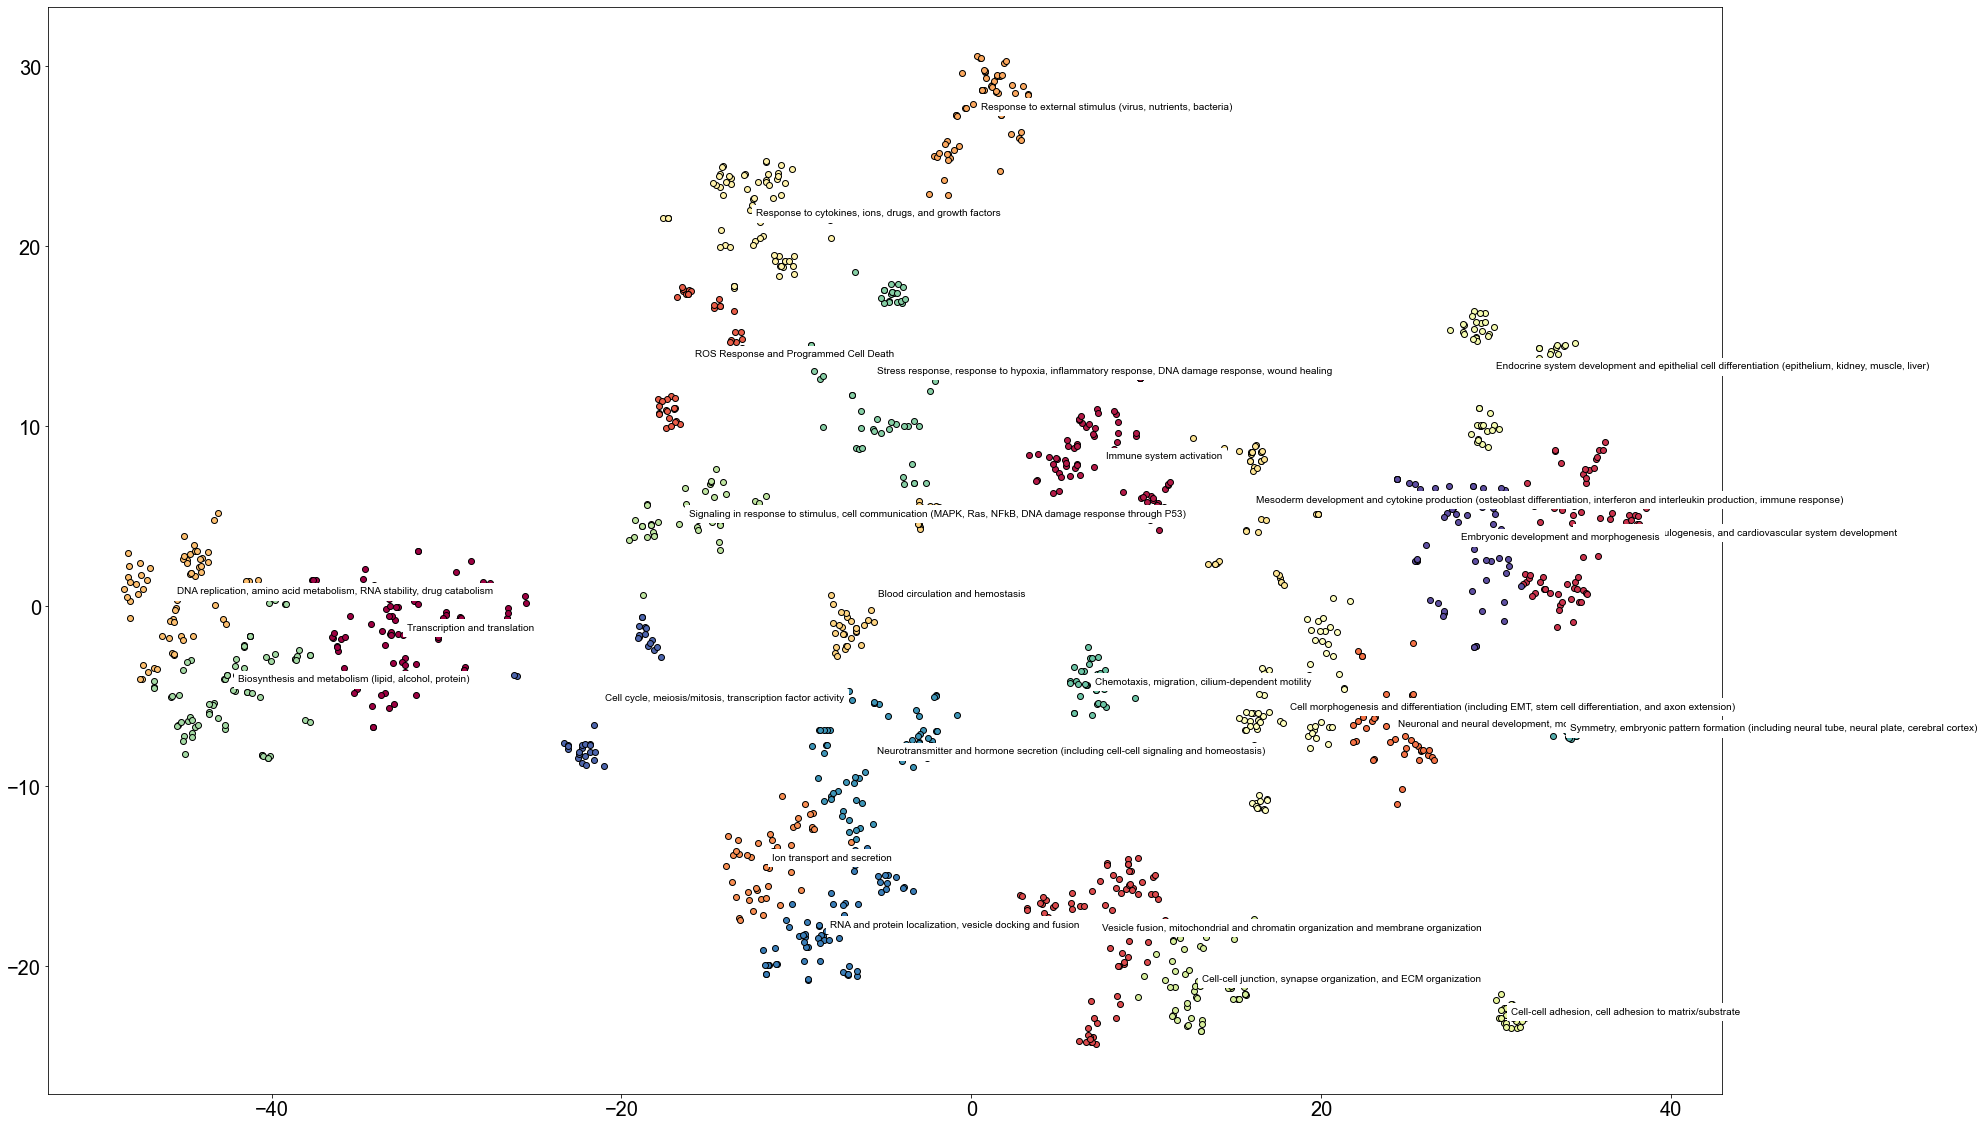

In [137]:
plt.figure(figsize = (30,20))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
    plt.text(x.mean(),y.mean(), cluster_dict_krasnow[k], size = 10, backgroundcolor = 'w', color = 'k')
plt.savefig('./out/tsne_pnec_krasnow_sclc_labeled.pdf')
    
# bounds = np.zeros((t.n_components,2))
# bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
# bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))


In [122]:
subtypes = df.columns[:-4]
hm = pd.DataFrame(index=set(ydf['kmeans']), columns=subtypes)
for s in subtypes:
    ind, count = np.unique(ydf.loc[set(ydf.index).intersection(set(df[df[f'{s}']!=1].index))]['kmeans'],return_counts=True)
    for i, c in zip(ind,count):
        hm.loc[i,s] = c
        

In [123]:
hm = hm.fillna(0).T/np.unique(ydf['kmeans'], return_counts=True)[1]

In [124]:
hm.columns = [cluster_dict_krasnow[i] for i in hm.columns]


In [125]:
new_ind = []
for i in hm.index:
    if "_arc" in i:
        new_ind.append(i.split('_')[0])
    else:
        new_ind.append(i)
hm.index = new_ind
        

In [126]:
hm

Transcription and translation  Immune system activation  \
PNEC_Krasnow/PNEC                         0.726316                  0.103896   
PNEC_Krasnow/TA                           0.557895                  0.077922   
PNEC_Krasnow/Non-NE                       0.126316                  0.688312   
SCLC-A                                    0.494737                  0.000000   
SCLC-A2                                   0.042105                  0.038961   
SCLC-N                                    0.063158                  0.000000   
SCLC-P                                    0.610526                  0.233766   
SCLC-Y                                    0.294737                  0.636364   

                     Angiogenesis, vasculogenesis, and cardiovascular system development  \
PNEC_Krasnow/PNEC                                             0.049383                     
PNEC_Krasnow/TA                                               0.000000                     
PNEC_Krasnow/Non-NE                                           0.308642                     
SCLC-A                                                        0.160494                     
SCLC-A2                                                       0.049383                     
SCLC-N                                                        0.074074                     
SCLC-P                                                        0.135802                     
SCLC-Y                                                        0.555556                     

                     Vesicle fusion, mitochondrial and chromatin organization and membrane organization  \
PNEC_Krasnow/PNEC                                             0.256757                                    
PNEC_Krasnow/TA                                               0.081081                                    
PNEC_Krasnow/Non-NE                                           0.378378                                    
SCLC-A                                                        0.162162                                    
SCLC-A2                                                       0.040541                                    
SCLC-N                                                        0.108108                                    
SCLC-P                                                        0.162162                                    
SCLC-Y                                                        0.445946                                    

                     ROS Response and Programmed Cell Death   \
PNEC_Krasnow/PNEC                                   0.422222   
PNEC_Krasnow/TA                                     0.222222   
PNEC_Krasnow/Non-NE                                 0.688889   
SCLC-A                                              0.000000   
SCLC-A2                                             0.111111   
SCLC-N                                              0.088889   
SCLC-P                                              0.177778   
SCLC-Y                                              0.288889   

                     Neuronal and neural development, morphogenesis, and differentiation  \
PNEC_Krasnow/PNEC                                             0.489796                     
PNEC_Krasnow/TA                                               0.000000                     
PNEC_Krasnow/Non-NE                                           0.122449                     
SCLC-A                                                        0.265306                     
SCLC-A2                                                       0.020408                     
SCLC-N                                                        0.408163                     
SCLC-P                                                        0.142857                     
SCLC-Y                                                        0.163265                     

                     Ion transport and secretion  \
PNEC_Krasnow/PNEC                       0.595745 

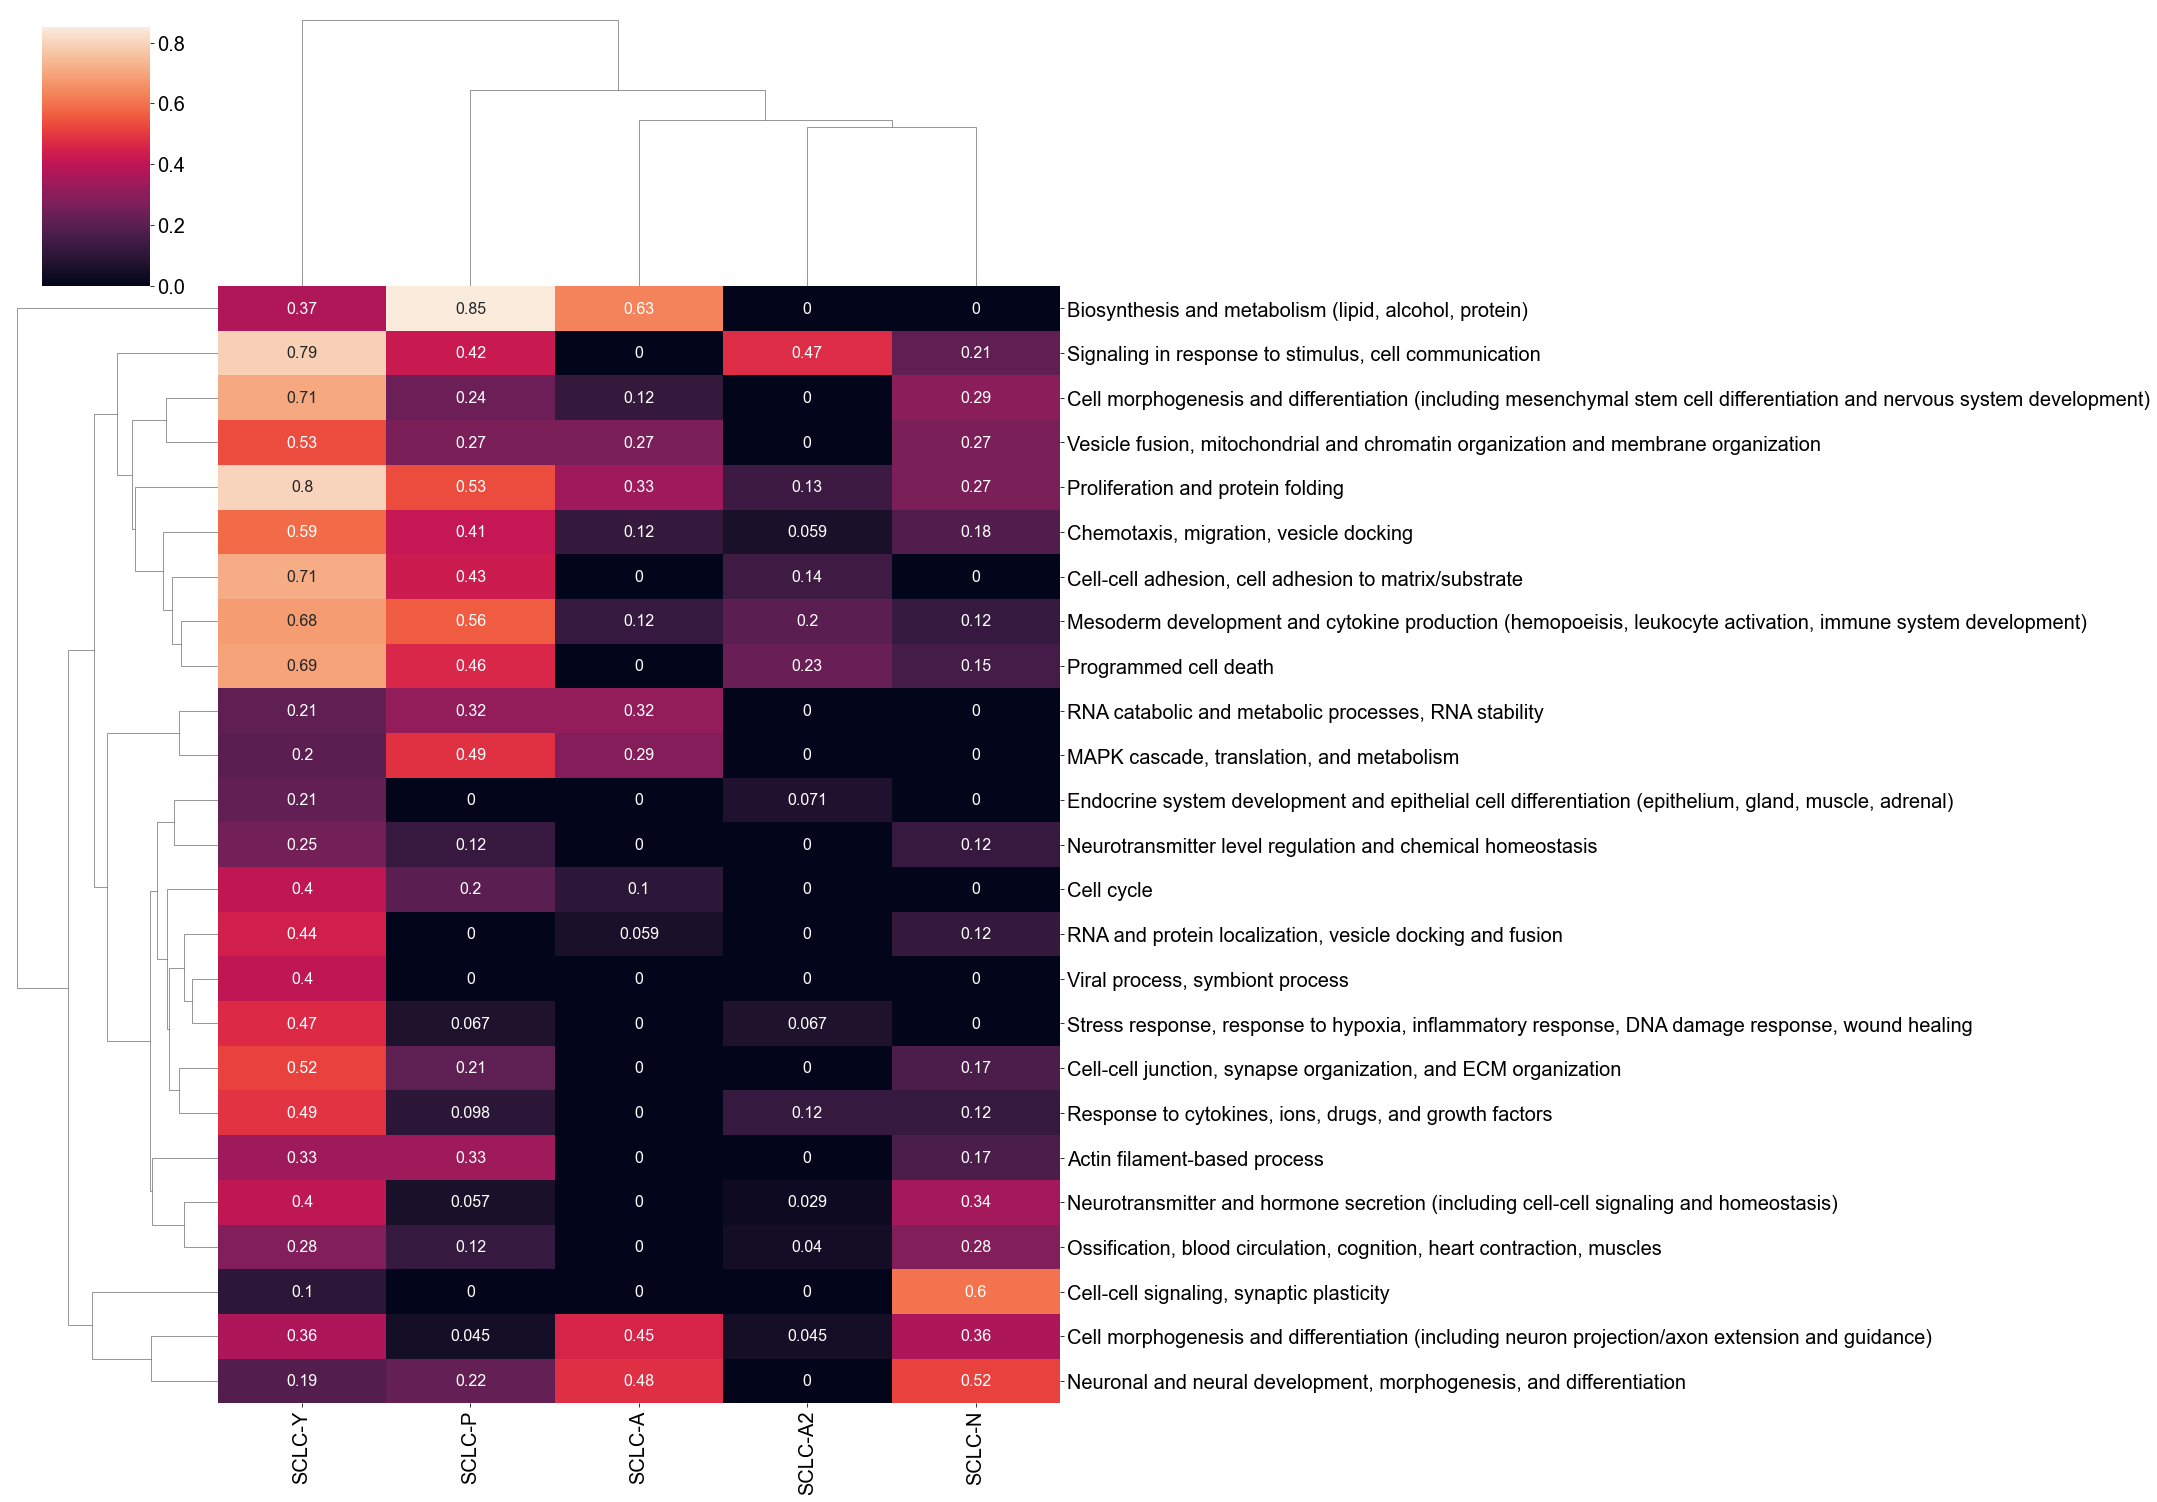

In [58]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
b = sns.clustermap(hm.T.sort_values('PNEC_Krasnow/PNEC').drop(hm.T.columns[0:3], axis =1), annot = True, col_cluster=True, figsize = (30,20), annot_kws = {'size':16})
plt.setp(b.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig('./out/pnec_krasnow_sclc_clustermap.pdf')

In [137]:
# for i,r in df.loc[df['SCLC-N_arc']!=1].sort_values('SCLC-N_arc').iterrows():
#     if 'axon' in r['name'] or 'projection' in r['name']:
#         print(r['name'])
#         print(r['terms'])

## PNECs from Krasnow vs. SCLC, only using GO terms significant for PNECs

In [100]:
df_pnec_only = df.loc[df['PNEC_Krasnow/PNEC']!= 1]

In [ ]:
df_pnec_only

In [103]:
df_pnec_only.to_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/pnec_krasnow_sclc_go_phenotypes_PNEC_SIG_ONLY.csv")

In [8]:
df = pd.read_csv(op.join(directory, "pnec_krasnow_sclc_go_phenotypes_PNEC_SIG_ONLY.csv"),index_col=0)

**Next, use this df in get_dissim.R and then in Plotly GO Maps.ipynb**

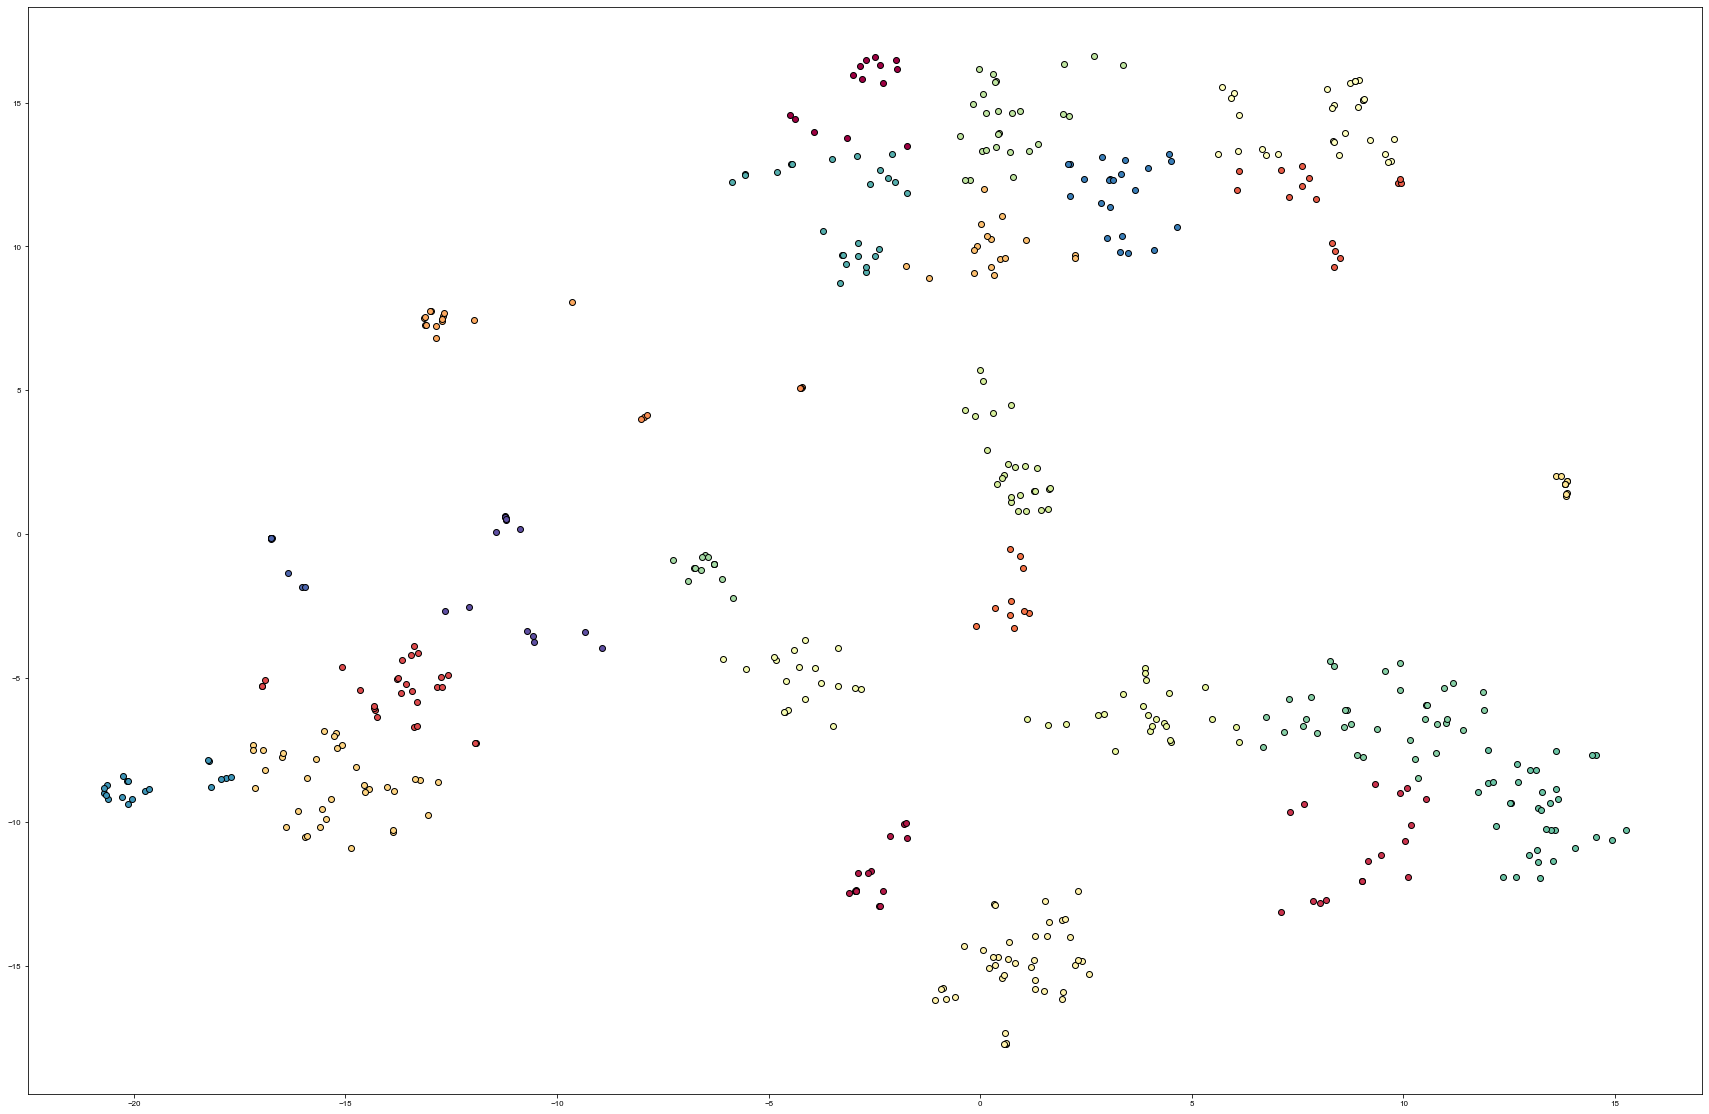

In [2]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AffinityPropagation
import plotly
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
import os.path as op
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import matplotlib
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans


np.random.seed(0)
font = {'weight' : 'normal',
        'family': 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

directory = "/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/"

#dissim = 1-pd.read_csv("../dist_all_rel.csv",index_col=0)
dissim = pd.read_csv(op.join(directory, "dist_all_rel_dendrogram_pnec_krasnow_sclc_PNEC_SIG_ONLY.csv"),index_col=0)
#dissim = 1-(dissim + dissim.transpose())

dissim = np.multiply(dissim, 1-np.eye(dissim.shape[0]))
dissim = np.power(dissim,6.)

go_phenotypes = pd.read_csv(op.join(directory, "pnec_krasnow_sclc_go_phenotypes_PNEC_SIG_ONLY.csv"),index_col=0)
go_phenotypes = go_phenotypes.loc[(go_phenotypes['level']>1) & (go_phenotypes['ont']=='BP')]


go_terms_to_keep = [i for i in dissim.index if dissim.loc[i].drop(i).std()>0] # GO terms with 0 distance to all other terms, or 1 distance to all other terms are dropped. The .drop(i) addresses the fact that terms with distance 1 from all others will still have distance 0 to themselves, which must be dropped prior to std
go_terms_to_keep = np.intersect1d(go_terms_to_keep, go_phenotypes.index)
go_phenotypes = go_phenotypes.loc[go_terms_to_keep]


dissim = dissim.loc[go_terms_to_keep, go_terms_to_keep]

t = TSNE(metric="precomputed",random_state=0, n_components = 2)
#t = MDS(dissimilarity="precomputed")
y = t.fit_transform(dissim)

ydf = pd.DataFrame(y, index=dissim.index, columns=['tsne%d'%(i+1) for i in range(t.n_components)])

db = KMeans(n_clusters=25).fit(ydf[['tsne1','tsne2']])
labels = db.labels_
    
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize = (30,20))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
#     plt.text(x.mean(),y.mean(), cluster_dict[k], size = 10, backgroundcolor = 'k', color = tuple(col))
# plt.savefig('./out/tsne_pnec_sclc_labeled_PNEC_SIG_ONLY.pdf')
    
bounds = np.zeros((t.n_components,2))
bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))

# fig = plt.figure()
# # AP = AffinityPropagation()#preference = preference)
# # AP.fit(ydf)
# ax = fig.add_subplot(111)
# #kernel = density.plot_density(ydf, continuous=True, ax=ax, bounds=bounds[[0,1],:], scatter="all")
# ax.scatter(ydf['tsne1'],ydf['tsne2'],s=1,c='#CCAACC', edgecolor='k', linewidth=0.3)


# if False:
#     top_level_phenotypes = ydf.loc[[ydf.index[xxx] for xxx in AP.cluster_centers_indices_]]
#     top_level_phenotypes['name']=go_phenotypes.loc[top_level_phenotypes.index, 'name']


# #for i, pheno in enumerate(["green", "brown", "blue", "yellow", "turquoise", "black", "red", "midnightblue", "purple", "pink", "salmon"]):
# # for i, pheno in enumerate(["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft']):
# for i, pheno in enumerate(["SCLC-Y_arc"]):

#     go_terms = go_phenotypes.loc[(go_phenotypes[pheno]) & (go_phenotypes['ont'] == 'BP')].index
#     go_colors = []
#     for i in go_terms:
#         if go_phenotypes.loc[i]['NE'] == True:
#             if go_phenotypes.loc[i][:-3].astype('int').sum() > 2: go_colors.append('lightblue') #if more than just the current subtype and NE share this go term
#             else:
#                 go_colors.append('Blue') #just NE and this subtype share the go term
#         else: go_colors.append("Green") #just this subtype has the go term
#     enrichment = pd.read_csv(op.join(directory,"%s_ontology.tab" % pheno.lower()), delimiter="\t", index_col="term_goid").loc[go_terms]

#     ydf['term'] = pd.Series(['x']*len(ydf.index))
#     for i,r in ydf.iterrows():
#         ydf.loc[i,'term'] = go_phenotypes.loc[i, 'name']
    
#sns.scatterplot(x = ydf.loc[go_terms,'tsne1'],
#             y = ydf.loc[go_terms,'tsne2'],)
       

#     ydfsmall = ydf.loc[go_terms]
#     ydflarge = ydf.drop(go_terms)

#print('static')
# plt.savefig(op.join(directory, "PNEC_space.pdf"))
#raise ValueError("HOK")

In [3]:
cluster_dict_ = {0:"Endocrine system development and epithelial cell differentiation (epithelium, gland, muscle, adrenal)",
               1:"Stress response, response to hypoxia, inflammatory response, DNA damage response, wound healing",# "Immune system activation",# "DNA binding and transporter activity",
               2: "Chemotaxis, migration, vesicle docking",#"Angiogenesis, vasculogenesis, and cardiovascular system development", #"Stress response",
               3: "Biosynthesis and metabolism (lipid, alcohol, protein)",#,#"Actin organization and migration",#"Metabolism",
               4: "Vesicle fusion, mitochondrial and chromatin organization and membrane organization",#"ROS Response and Programmed Cell Death ",
               5: "Cell-cell signaling, synaptic plasticity",# #
               6: "Actin filament-based process",#"Ion transport and secretion" ,
               7: "Cell-cell adhesion, cell adhesion to matrix/substrate",#"Response to external stimulus (virus, nutrients, bacteria)", #"Secretion and homeostasis",
               8:"Cell morphogenesis and differentiation (including mesenchymal stem cell differentiation and nervous system development)",#"DNA replication, amino acid metabolism, RNA stability, drug catabolism", #"ROS-induced metabolic process and protein folding",
               9: "MAPK cascade, translation, and metabolism",#"Blood circulation and hemostasis",
               10: "Viral process, symbiont process",#
               11: "Response to cytokines, ions, drugs, and growth factors",
               12: "Cell-cell junction, synapse organization, and ECM organization",#,
               13: "Signaling in response to stimulus, cell communication",#Cell communication and signaling, response to stimulus"
               14: "Neurotransmitter level regulation and chemical homeostasis", #'Cell cycle',
               15: "Ossification, blood circulation, cognition, heart contraction, muscles",
               16:  "Neuronal and neural development, morphogenesis, and differentiation",
               17:  "Programmed cell death",
               18:  "Neurotransmitter and hormone secretion (including cell-cell signaling and homeostasis)",
               19: "RNA and protein localization, vesicle docking and fusion",
               20: "Mesoderm development and cytokine production (hemopoeisis, leukocyte activation, immune system development)",#"Symmetry, embryonic pattern formation (including neural tube, neural plate, cerebral cortex)",
                21: "RNA catabolic and metabolic processes, RNA stability",
                22: "Cell morphogenesis and differentiation (including neuron projection/axon extension and guidance)",#"Cognition, learning, and action potential conduction",
                23: "Cell cycle",
                24: "Proliferation and protein folding"
               }

In [4]:
# [print(i) for i in ydf.loc[ydf['kmeans']==24]['name']]

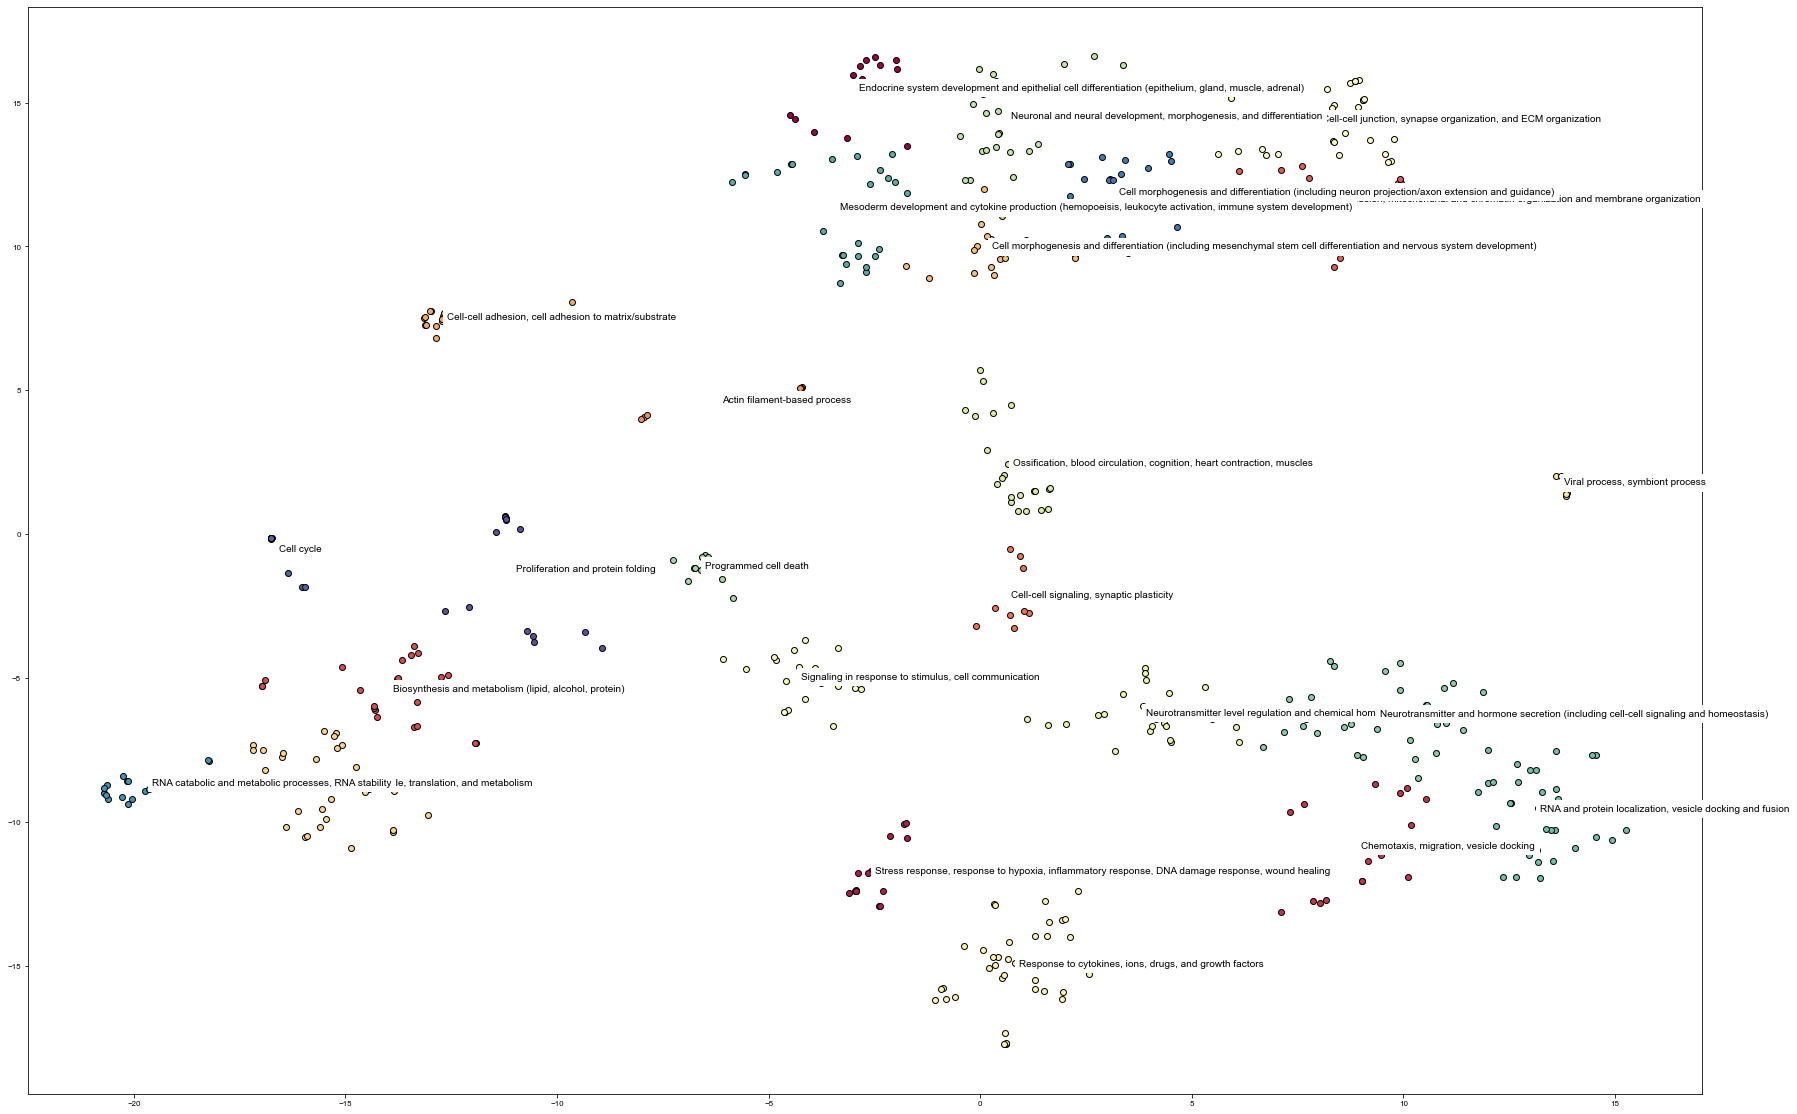

In [5]:
plt.figure(figsize = (30,20))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
    plt.text(x.mean(),y.mean(), cluster_dict_[k], size = 10, backgroundcolor = 'w', color = 'k')
plt.savefig('./out/tsne_pnec_krasnow_sclc_labeled_PNEC_SIG_ONLY.pdf')
    
# bounds = np.zeros((t.n_components,2))
# bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
# bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))


In [9]:
ydf['kmeans']=db.labels_
ydf['name'] = df.loc[ydf.index]['name']
subtypes = df.columns[:-4]
hm = pd.DataFrame(index=set(ydf['kmeans']), columns=subtypes)
for s in subtypes:
    ind, count = np.unique(ydf.loc[set(ydf.index).intersection(set(df[df[f'{s}']!=1].index))]['kmeans'],return_counts=True)
    for i, c in zip(ind,count):
        hm.loc[i,s] = c
        

In [10]:
hm = hm.fillna(0).T/np.unique(ydf['kmeans'], return_counts=True)[1]

In [11]:
hm.columns = [cluster_dict_[i] for i in hm.columns]


In [12]:
new_ind = []
for i in hm.index:
    if "_arc" in i:
        new_ind.append(i.split('_')[0])
    else:
        new_ind.append(i)
hm.index = new_ind
        

In [13]:
hm

Endocrine system development and epithelial cell differentiation (epithelium, gland, muscle, adrenal)  \
PNEC_Krasnow/PNEC                                             1.000000                                                       
PNEC_Krasnow/TA                                               0.000000                                                       
PNEC_Krasnow/Non-NE                                           0.071429                                                       
SCLC-A                                                        0.000000                                                       
SCLC-A2                                                       0.071429                                                       
SCLC-N                                                        0.000000                                                       
SCLC-P                                                        0.000000                                                       
SCLC-Y                                                        0.214286                                                       

                     Stress response, response to hypoxia, inflammatory response, DNA damage response, wound healing  \
PNEC_Krasnow/PNEC                                             1.000000                                                 
PNEC_Krasnow/TA                                               0.400000                                                 
PNEC_Krasnow/Non-NE                                           0.600000                                                 
SCLC-A                                                        0.000000                                                 
SCLC-A2                                                       0.066667                                                 
SCLC-N                                                        0.000000                                                 
SCLC-P                                                        0.066667                                                 
SCLC-Y                                                        0.466667                                                 

                     Chemotaxis, migration, vesicle docking  \
PNEC_Krasnow/PNEC                                  1.000000   
PNEC_Krasnow/TA                                    0.058824   
PNEC_Krasnow/Non-NE                                0.647059   
SCLC-A                                             0.117647   
SCLC-A2                                            0.058824   
SCLC-N                                             0.176471   
SCLC-P                                             0.411765   
SCLC-Y                                             0.588235   

                     Biosynthesis and metabolism (lipid, alcohol, protein)  \
PNEC_Krasnow/PNEC                                             1.000000       
PNEC_Krasnow/TA                                               0.407407       
PNEC_Krasnow/Non-NE                                           0.259259       
SCLC-A                                                        0.629630       
SCLC-A2                                                       0.000000       
SCLC-N                                                        0.000000       
SCLC-P                                                        0.851852       
SCLC-Y                                                        0.370370       

                     Vesicle fusion, mitochondrial and chromatin organization and membrane organization  \
PNEC_Krasnow/PNEC                                             1.000000                                    
PNEC_Krasnow/TA                                               0.133333                                    
PNEC_Krasnow/Non-NE                                           0.333333                                    
SCLC-A                                                        0.266667                                    

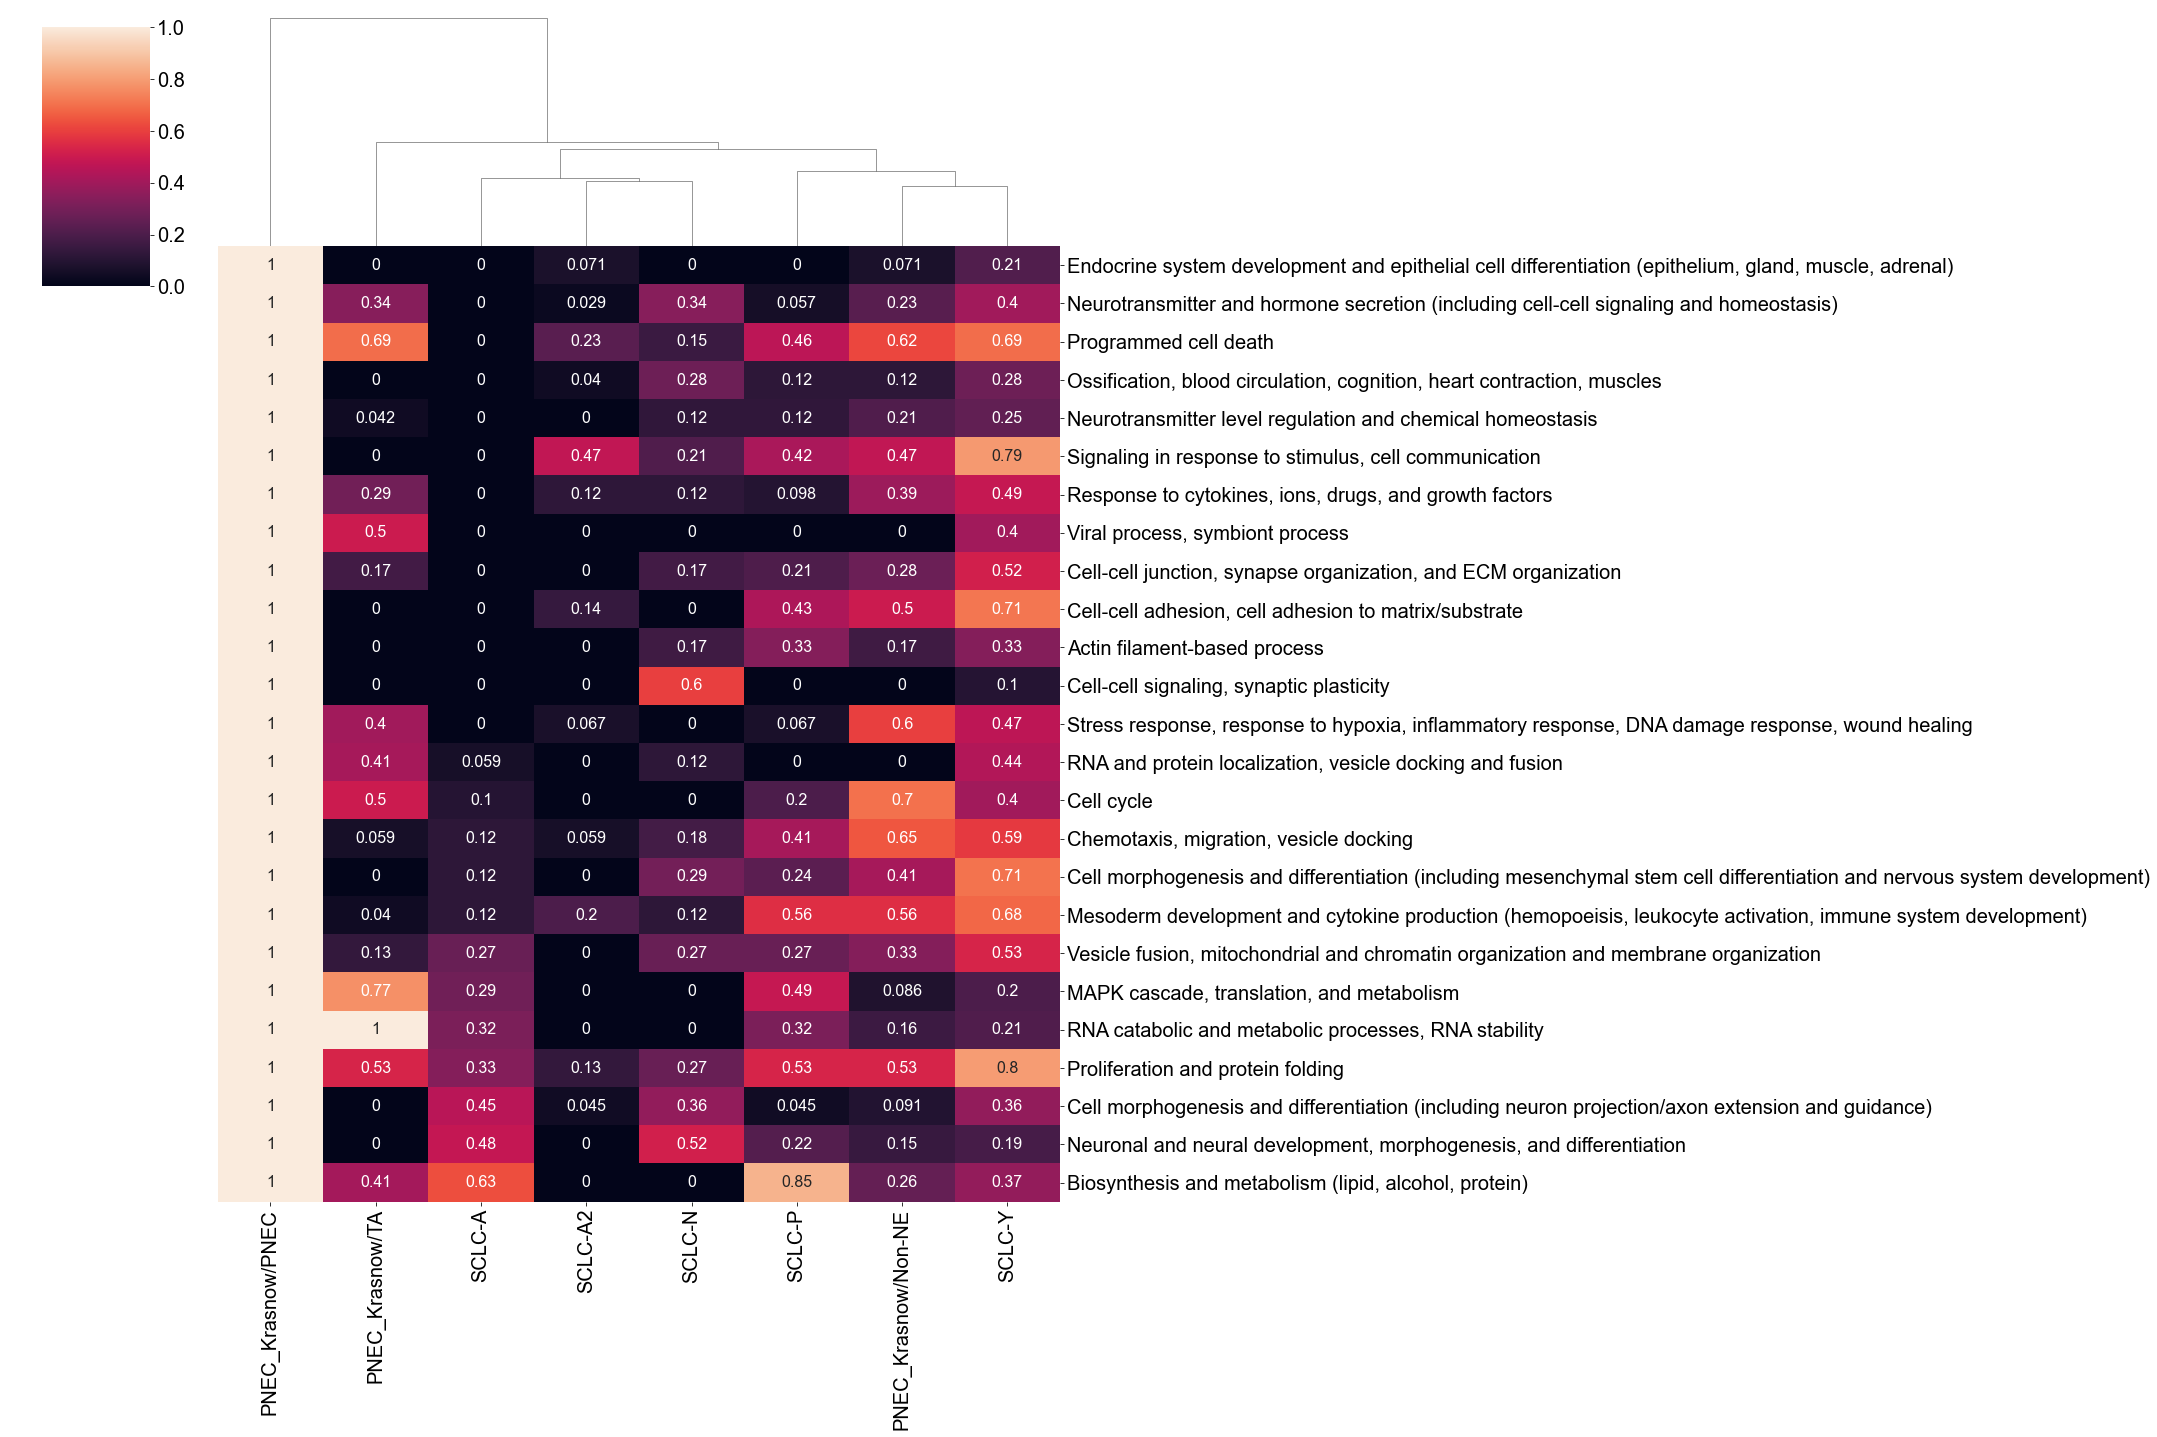

In [14]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
b = sns.clustermap(hm.T.sort_values('SCLC-A'), annot = True, col_cluster=True,row_cluster=False, figsize = (30,20), annot_kws = {'size':16})
plt.setp(b.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig('./out/pnec_krasnow_sclc_clustermap_PNEC_SIG_ONLY.pdf')

In [21]:
top_go = []
for s in df.columns[3:8]:
    for go in df.sort_values(s)[0:10].index:
        top_go.append(go)

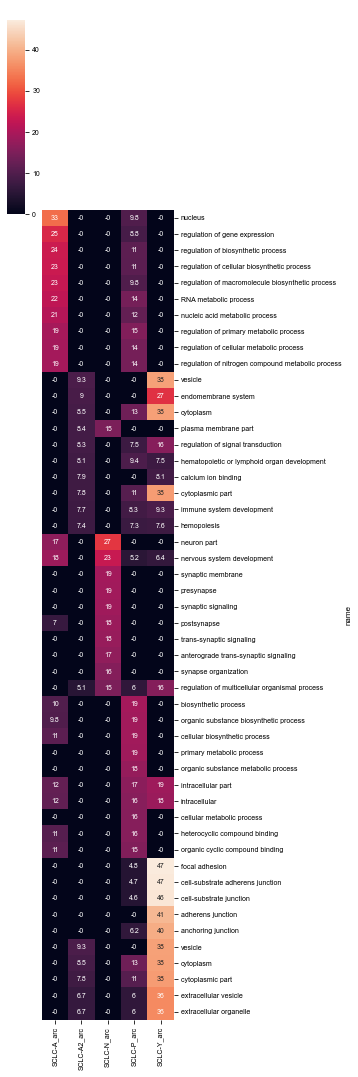

In [42]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

matplotlib.rc('font', **font)
top = df.loc[top_go]
top.index = top.name
top = -np.log(top[top.columns[3:8]])
b = sns.clustermap(top,annot = True, col_cluster=False,row_cluster=False, figsize = (5,15), annot_kws = {'size':7})


## Using SCLC GO Expression

In [343]:
go_expr = pd.read_table(op.join(outdir,"arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.PROJssGSEA.gct"),skiprows=[0,1],index_col=0, header=0, sep='\t')

In [344]:
go_expr=go_expr.T.drop('Description')

In [345]:
# go_expr = pd.read_csv('./arc_space/GOExpression_bp.txt', header=0, index_col = None, sep = '\t')
# go_expr.index = data.index


In [346]:
go_names = []
for c in go_expr.columns:
    go_name = c.split('_')[1:]
    go_names.append(" ".join(go_name).lower())
go_expr=go_expr.astype(float)
go_expr.columns = go_names


In [347]:
clines = pd.read_csv(op.join(outdir,"arc_space/combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)


In [348]:
go_expr['cluster'] = clines['10_08_2020']

In [352]:
go_subtype_expr = go_expr.groupby('cluster').mean()

In [353]:
go_id_PNEC_match = []
go_name_PNEC_match = []
for i,r in df_pnec_only.iterrows():
    if r['name'] in go_expr.columns:
        go_name_PNEC_match.append(r['name'])
        go_id_PNEC_match.append(i)

In [365]:
df_ = df_pnec_only.copy()
df_ = df_.loc[go_id_PNEC_match]
for g, n in zip(go_id_PNEC_match, go_name_PNEC_match):
    for s in ['A','A2','N','P','Y']:
        df_.loc[g,f"SCLC-{s}_arc"] = go_subtype_expr.loc[s, n]

In [366]:
df_ = df_.drop(['PNEC_Krasnow/PNEC','PNEC_Krasnow/TA','PNEC_Krasnow/Non-NE'], axis = 1)

In [371]:
subtypes = df_.columns[:-4]
hm = pd.DataFrame( columns=subtypes)
tmp = ydf.loc[set(ydf.index).intersection(df_.index)].copy()

for s in subtypes:
#     ind, count = np.unique(ydf.loc[set(ydf.index).intersection(set(df[df[f'{s}']!=1].index))]['kmeans'],return_counts=True)
    tmp[s] = df_[s].astype(float)
count = tmp.drop(['tsne2','tsne1'],axis = 1).groupby('kmeans').mean()
for i,r in count.iterrows():
    hm = hm.append(r)
hm = hm.T

In [372]:
hm.columns = [cluster_dict_[i] for i in hm.columns]


In [373]:
new_ind = []
for i in hm.index:
    if "_arc" in i:
        new_ind.append(i.split('_')[0])
    else:
        new_ind.append(i)
hm.index = new_ind
        

In [374]:
hm

Endocrine system development and epithelial cell differentiation (epithelium, gland, muscle, adrenal)  \
SCLC-A                                         -530.527345                                                       
SCLC-A2                                        -613.496170                                                       
SCLC-N                                         -765.416534                                                       
SCLC-P                                         -640.301960                                                       
SCLC-Y                                         -527.869088                                                       

         Stress response, response to hypoxia, inflammatory response, DNA damage response, wound healing  \
SCLC-A                                         1266.880217                                                 
SCLC-A2                                        1425.809673                                                 
SCLC-N                                         1324.377226                                                 
SCLC-P                                         1500.609206                                                 
SCLC-Y                                         1778.992831                                                 

         Chemotaxis, migration, vesicle docking  \
SCLC-A                               195.207086   
SCLC-A2                              182.424014   
SCLC-N                               235.458552   
SCLC-P                                49.789672   
SCLC-Y                               249.036890   

         Biosynthesis and metabolism (lipid, alcohol, protein)  \
SCLC-A                                          958.013060       
SCLC-A2                                         853.572373       
SCLC-N                                          919.656100       
SCLC-P                                         1103.772705       
SCLC-Y                                         1071.308187       

         Vesicle fusion, mitochondrial and chromatin organization and membrane organization  \
SCLC-A                                         2147.182582                                    
SCLC-A2                                        2101.650497                                    
SCLC-N                                         2282.084490                                    
SCLC-P                                         1959.011542                                    
SCLC-Y                                         2175.415603                                    

         Cell-cell signaling, synaptic plasticity  \
SCLC-A                                -159.742790   
SCLC-A2                               -834.668735   
SCLC-N                                 302.121501   
SCLC-P                               -1085.554964   
SCLC-Y                               -1279.378583   

         Actin filament-based process  \
SCLC-A                    1385.406302   
SCLC-A2                   1676.518460   
SCLC-N                    1274.144050   
SCLC-P                    1558.674458   
SCLC-Y                    1525.118627   

         Cell-cell adhesion, cell adhesion to matrix/substrate  \
SCLC-A                                         -624.864869       
SCLC-A2                                        -244.579143       
SCLC-N                                         -799.126989       
SCLC-P                                          -58.548063       
SCLC-Y                                          304.339428       

         Cell morphogenesis and differentiation (including mesenchymal stem cell differentiation and nervous system development)  \
SCLC-A                                         -361.704491                                                                         
SCLC-A2                                        -525.587964                                                                         
SCLC-N                                   

[None, None, None, None, None, None, None, None, None, None]

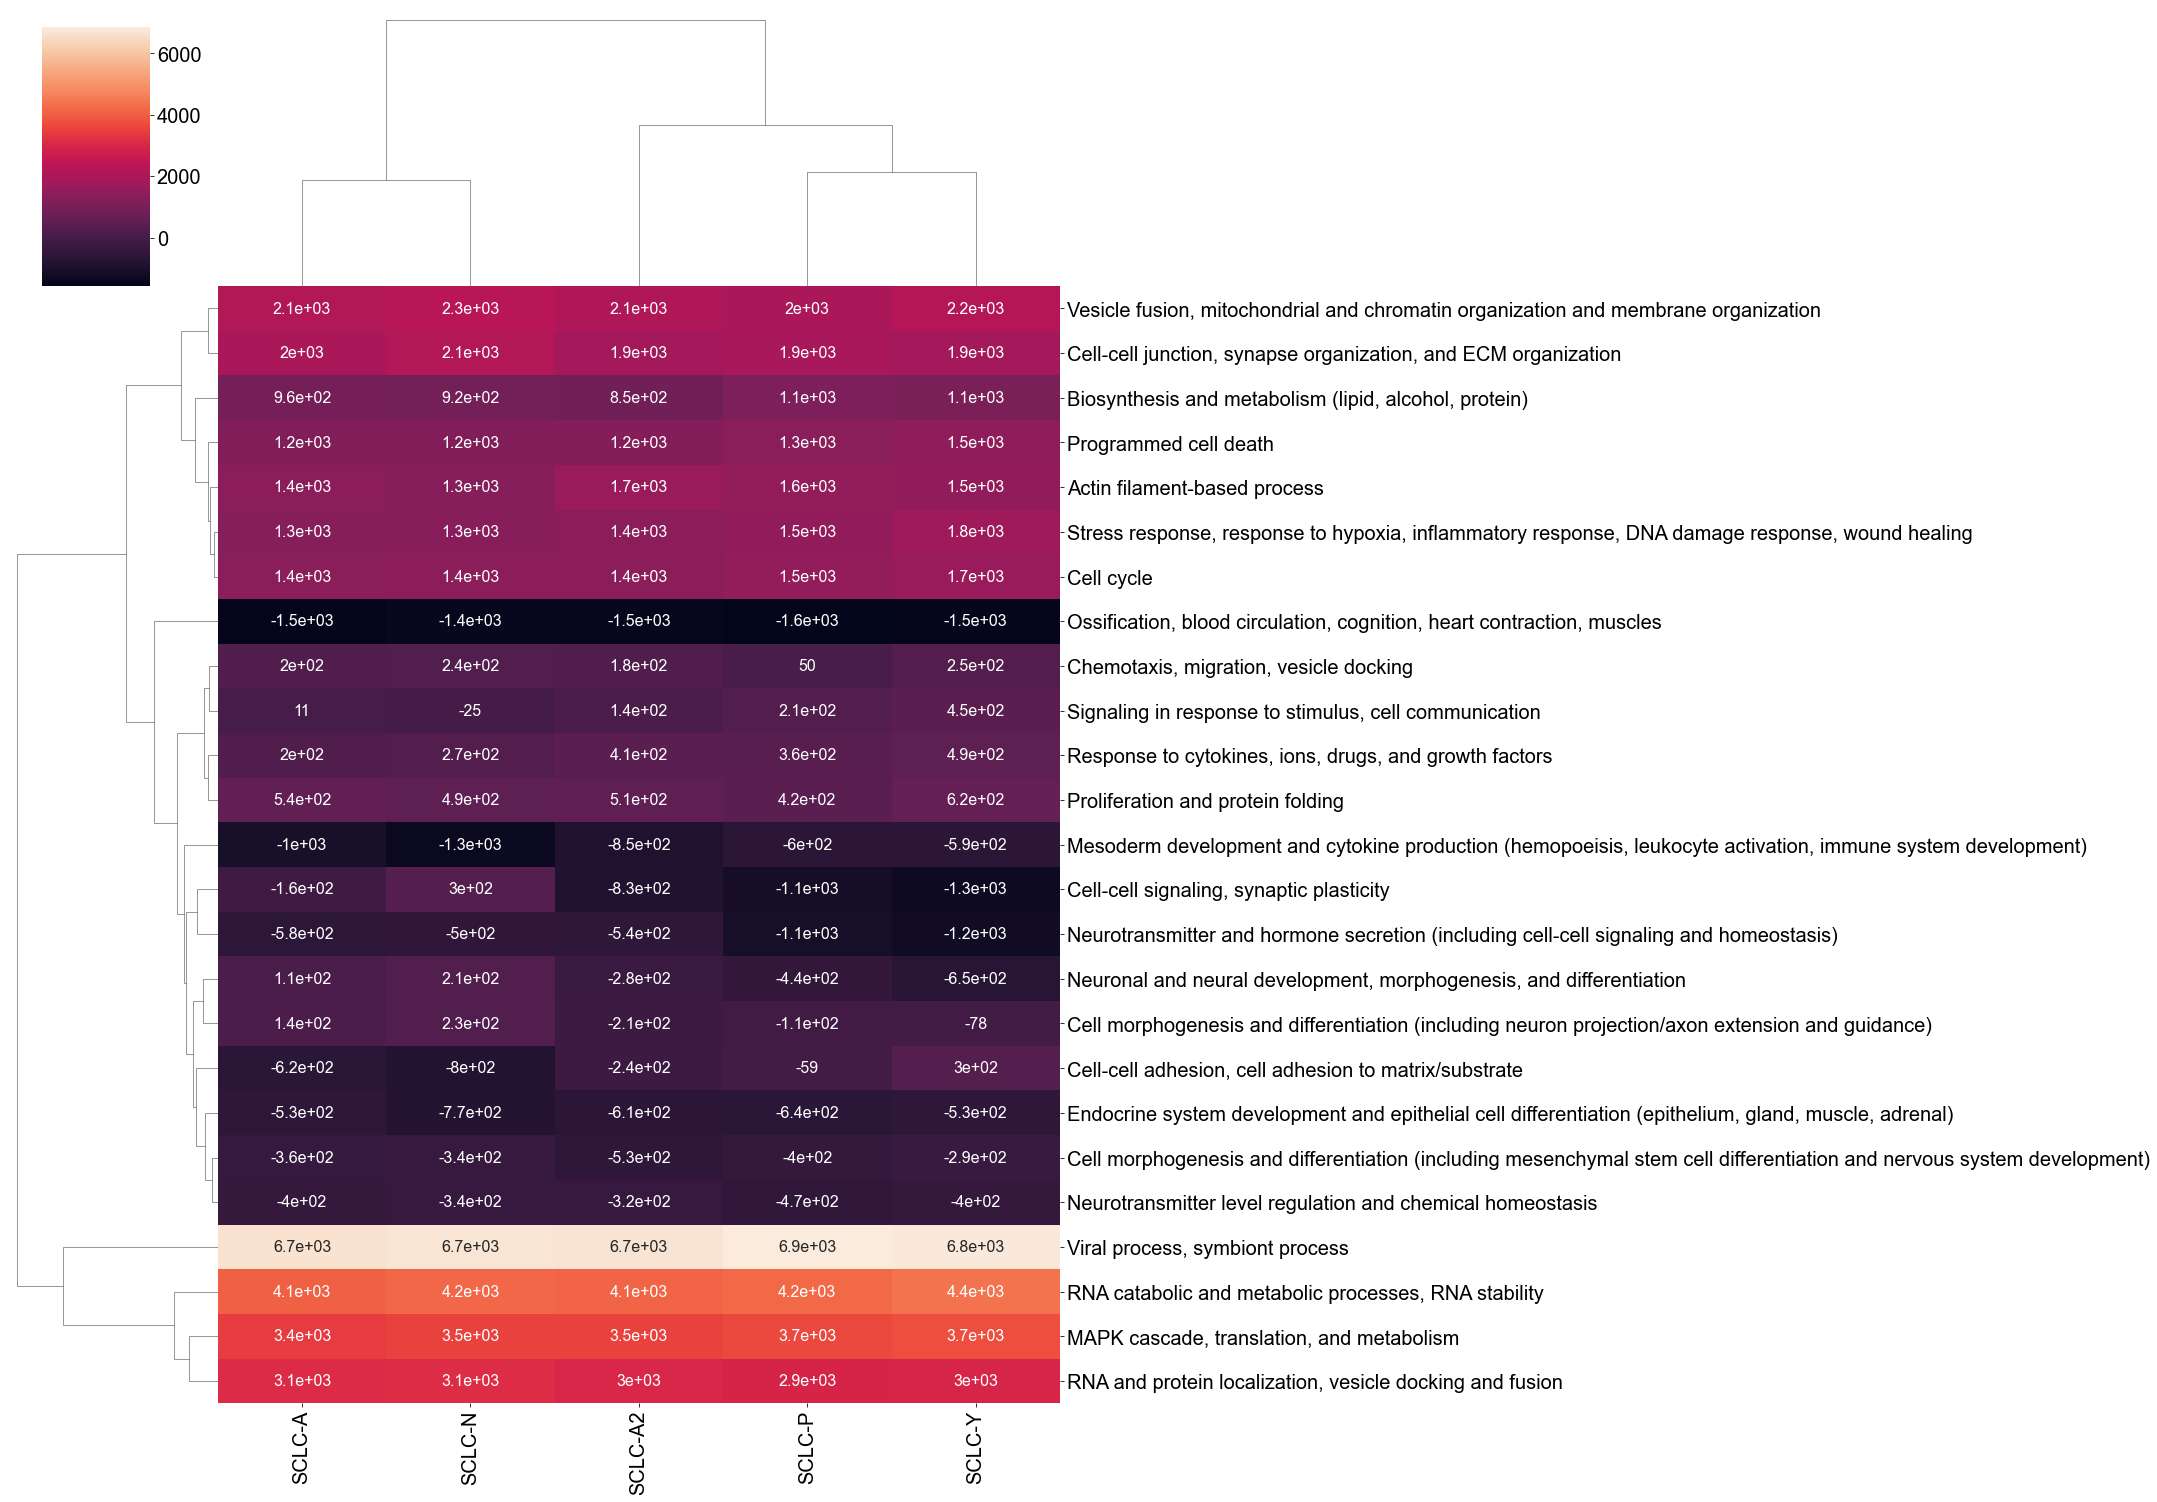

In [375]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
b = sns.clustermap(hm.T, annot = True, col_cluster=True, figsize = (30,20), annot_kws = {'size':16})
plt.setp(b.ax_heatmap.get_xticklabels(), rotation=90)
# plt.savefig('./out/pnec_krasnow_sclc_clustermap_PNEC_SIG_ONLY.pdf')

# Airway Epithelium

In [31]:
airway = sc.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/airway_epithelium/trachea_10x_log2TPM.txt', delimiter= '\t')

In [32]:
airway = airway.T

In [33]:
airway.var_names = [i.upper() for i in airway.var_names]

In [34]:
airway_cluster = pd.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/airway_epithelium/trachea_10x_metadata.txt', sep = '\t', index_col=0)
airway_cluster = airway_cluster.drop('TYPE')

In [35]:
airway.obs['cluster'] = airway_cluster['cluster']

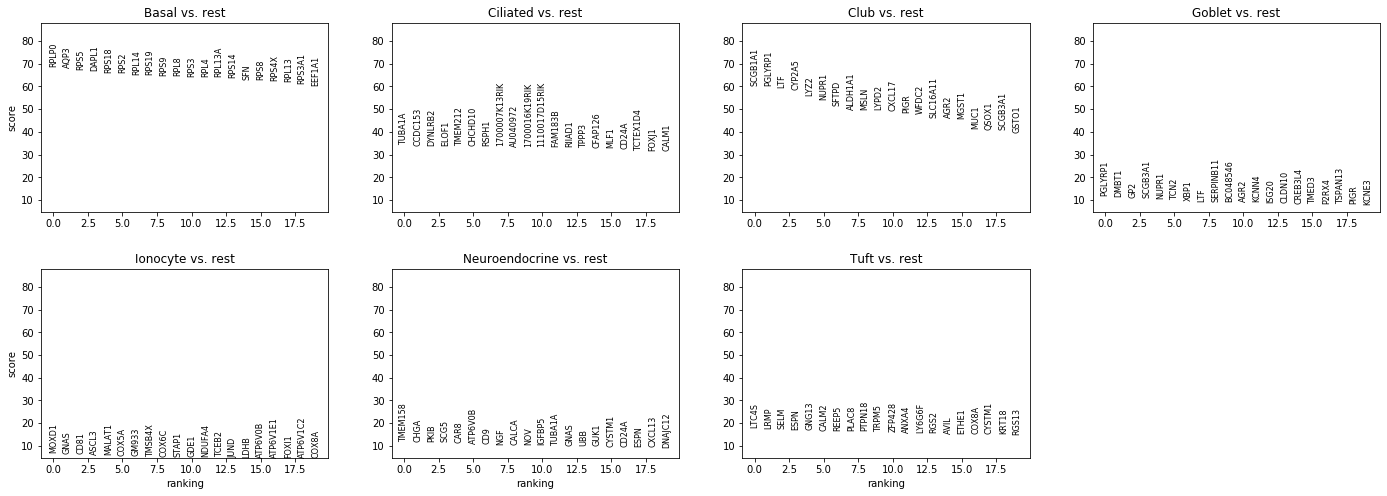

In [39]:
sc.tl.rank_genes_groups(airway, groupby='cluster', method='wilcoxon')
sc.pl.rank_genes_groups(airway)

In [50]:
# [print(i) for i in list(airway.uns['rank_genes_groups']['names']['Tuft'])[:400]]

#     enrich = sc.queries.enrich(airway, name, org='hsapiens', gprofiler_kwargs={'sources':['GO:BP'],'all_results':True})
    

In [ ]:
# x = 0
# for i in airway.uns['rank_genes_groups']['names']['Neuroendocrine']:
#     print(i) 
#     if x == 400: break
#     x += 1
    

In [52]:
df = pd.DataFrame(index=["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft','ont','name','level'])
categories = {'b':'BP','c':'CL','m':'MF'}

for m in df.index[:-3]:
    indf = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/%s_ontology.tab"%m, delimiter="\t")
#    indf = indf.loc[indf['q-value'] < 0.05]
    for i in indf.index:
        goid = indf.loc[i,'term_goid']
        if goid not in df.columns:
            df[goid]=False
            df.loc['ont',goid]= categories[indf.loc[i,'term_category']]
            df.loc['name',goid]= indf.loc[i,'term_name']
            df.loc['level',goid]= indf.loc[i,'term_level']
        df.loc[m,goid]=True
        



df = df.transpose()
df.to_csv("all_go_phenotypes.csv")

In [86]:
%load_ext rpy2.ipython

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GOSemSim")
library(GOSemSim)





In [ ]:
df = enrich[['native','name','significant']]
df.index = df['native']
df = df.drop('native',axis = 1)

In [ ]:
%%R -i df

tmp.go.data <- godata('org.Hs.eg.db', ont="BP", computeIC=TRUE)


#dff <- subset(df, (NE=="True" | MLH=="True") & ont=='BP')
#dff <- subset(df, ont=='BP' & (level==2 | level==3))
dff <- subset(df, significant=='True')



d <- mgoSim(row.names(dff),row.names(dff),semData=tmp.go.data,measure="Rel",combine=NULL)

# d[is.na(d)] <- 0
d <- 1-d

colnames(d) <- row.names(dff)#$name
row.names(d) <- row.names(dff)#$name


## Airway epithelium compared to SCLC subtypes

**Use top 400 genes from each cell type (rank_genes or archetype enriched) in Consensus Path DB to generate tab files**

In [191]:
df = pd.DataFrame(index=["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft','SCLC-A_arc','SCLC-A2_arc','SCLC-N_arc',
                         'SCLC-P_arc','SCLC-Y_arc','terms','ont','name','level'])

categories = {'b':'BP','c':'CL','m':'MF'}

for m in df.index[:-4]:
    indf = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/%s_ontology.tab"%m, delimiter="\t")
#    indf = indf.loc[indf['q-value'] < 0.05]
    for i in indf.index:
        goid = indf.loc[i,'term_goid']
        if goid not in df.columns:
            df[goid]=1 #changed from False
            df.loc['ont',goid]= categories[indf.loc[i,'term_category']]
            df.loc['name',goid]= indf.loc[i,'term_name']
            df.loc['level',goid]= indf.loc[i,'term_level']
            df.loc['terms',goid]= indf.loc[i,'members_input_overlap_geneids']

        df.loc[m,goid]=indf.loc[i,'p-value'] #changed from True
        



df = df.transpose()
df.to_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/airway_sclc_go_phenotypes.csv")

In [60]:
# for i,r in df.loc[df['SCLC-N_arc']!=1].sort_values('SCLC-N_arc').iterrows():
#     if 'axon' in r['name'] or 'projection' in r['name']:
#         print(r['name'])
#         print(r['terms'])

**Next, use this df in get_dissim.R and then in Plotly GO Maps.ipynb**
in get_dissim.R we only consider biological processes

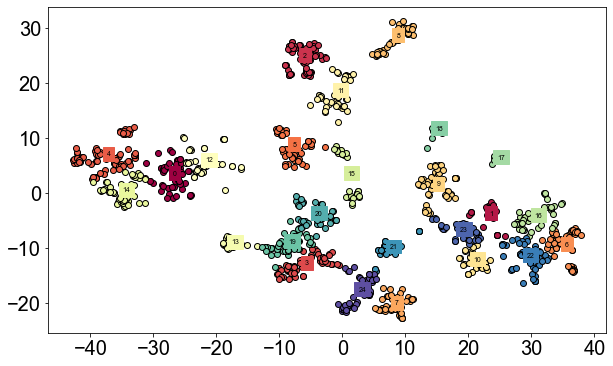

In [171]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AffinityPropagation
import plotly
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
import os.path as op
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import matplotlib
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans


np.random.seed(0)
font = {'weight' : 'normal',
        'family': 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

directory = "/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/"

#dissim = 1-pd.read_csv("../dist_all_rel.csv",index_col=0)
dissim = pd.read_csv(op.join(directory, "dist_all_rel_dendrogram_pnec_sclc.csv"),index_col=0)
#dissim = 1-(dissim + dissim.transpose())

dissim = np.multiply(dissim, 1-np.eye(dissim.shape[0]))
dissim = np.power(dissim,6.)

go_phenotypes = pd.read_csv(op.join(directory, "airway_sclc_go_phenotypes.csv"),index_col=0)
go_phenotypes = go_phenotypes.loc[(go_phenotypes['level']>1) & (go_phenotypes['ont']=='BP')]


go_terms_to_keep = [i for i in dissim.index if dissim.loc[i].drop(i).std()>0] # GO terms with 0 distance to all other terms, or 1 distance to all other terms are dropped. The .drop(i) addresses the fact that terms with distance 1 from all others will still have distance 0 to themselves, which must be dropped prior to std
go_terms_to_keep = np.intersect1d(go_terms_to_keep, go_phenotypes.index)
go_phenotypes = go_phenotypes.loc[go_terms_to_keep]


dissim = dissim.loc[go_terms_to_keep, go_terms_to_keep]

t = TSNE(metric="precomputed",random_state=0, n_components = 2)
#t = MDS(dissimilarity="precomputed")
y = t.fit_transform(dissim)

ydf = pd.DataFrame(y, index=dissim.index, columns=['tsne%d'%(i+1) for i in range(t.n_components)])

db = KMeans(n_clusters=25).fit(ydf[['tsne1','tsne2']])
labels = db.labels_
    
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
# colors = [plt.cm.tab20(i) for i in range(len(unique_labels))]
plt.figure(figsize = (10,6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
    plt.text(x.mean(),y.mean(), k, size = 7, color = 'k', backgroundcolor = tuple(col))
plt.savefig('./out/tsne_airway_sclc_labeled.pdf')
    
bounds = np.zeros((t.n_components,2))
bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))

# fig = plt.figure()
# # AP = AffinityPropagation()#preference = preference)
# # AP.fit(ydf)
# ax = fig.add_subplot(111)
# #kernel = density.plot_density(ydf, continuous=True, ax=ax, bounds=bounds[[0,1],:], scatter="all")
# ax.scatter(ydf['tsne1'],ydf['tsne2'],s=1,c='#CCAACC', edgecolor='k', linewidth=0.3)


# if False:
#     top_level_phenotypes = ydf.loc[[ydf.index[xxx] for xxx in AP.cluster_centers_indices_]]
#     top_level_phenotypes['name']=go_phenotypes.loc[top_level_phenotypes.index, 'name']


# #for i, pheno in enumerate(["green", "brown", "blue", "yellow", "turquoise", "black", "red", "midnightblue", "purple", "pink", "salmon"]):
# # for i, pheno in enumerate(["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft']):
# for i, pheno in enumerate(["SCLC-Y_arc"]):

#     go_terms = go_phenotypes.loc[(go_phenotypes[pheno]) & (go_phenotypes['ont'] == 'BP')].index
#     go_colors = []
#     for i in go_terms:
#         if go_phenotypes.loc[i]['NE'] == True:
#             if go_phenotypes.loc[i][:-3].astype('int').sum() > 2: go_colors.append('lightblue') #if more than just the current subtype and NE share this go term
#             else:
#                 go_colors.append('Blue') #just NE and this subtype share the go term
#         else: go_colors.append("Green") #just this subtype has the go term
#     enrichment = pd.read_csv(op.join(directory,"%s_ontology.tab" % pheno.lower()), delimiter="\t", index_col="term_goid").loc[go_terms]

#     ydf['term'] = pd.Series(['x']*len(ydf.index))
#     for i,r in ydf.iterrows():
#         ydf.loc[i,'term'] = go_phenotypes.loc[i, 'name']
    
#sns.scatterplot(x = ydf.loc[go_terms,'tsne1'],
#             y = ydf.loc[go_terms,'tsne2'],)
       

#     ydfsmall = ydf.loc[go_terms]
#     ydflarge = ydf.drop(go_terms)

#print('static')
# plt.savefig(op.join(directory, "PNEC_space.pdf"))
#raise ValueError("HOK")

tsne1      tsne2  kmeans  \
GO:0000912   0.313431   6.870311      15   
GO:0000915   4.258235 -14.679639      24   
GO:0001676 -39.044342   5.908057       4   
GO:0001775  14.932561   4.332542       9   
GO:0001816  13.239987  -2.996684       9   
...               ...        ...     ...   
GO:1902531  -6.615811   7.223680       5   
GO:2000026  18.651291  -5.648652      23   
GO:2000145   6.189169 -10.368684      21   
GO:2000489  14.624025   4.942925       9   
GO:2000736  18.878603  -7.245934      23   

                                                         name  
GO:0000912  assembly of actomyosin apparatus involved in c...  
GO:0000915               actomyosin contractile ring assembly  
GO:0001676            long-chain fatty acid metabolic process  
GO:0001775                                    cell activation  
GO:0001816                                cytokine production  
...                                                       ...  
GO:1902531    regulation of intracellular signal transduction  
GO:2000026  regulation of multicellular organismal develop...  
GO:2000145                        regulation of cell motility  
GO:2000489     regulation of hepatic stellate cell activation  
GO:2000736            regulation of stem cell differentiation  

[273 rows x 4 columns]

In [198]:
tmp

tsne1      tsne2  kmeans  \
GO:0000912   0.313431   6.870311      15   
GO:0000915   4.258235 -14.679639      24   
GO:0001676 -39.044342   5.908057       4   
GO:0001775  14.932561   4.332542       9   
GO:0001816  13.239987  -2.996684       9   
...               ...        ...     ...   
GO:1902531  -6.615811   7.223680       5   
GO:2000026  18.651291  -5.648652      23   
GO:2000145   6.189169 -10.368684      21   
GO:2000489  14.624025   4.942925       9   
GO:2000736  18.878603  -7.245934      23   

                                                         name  
GO:0000912  assembly of actomyosin apparatus involved in c...  
GO:0000915               actomyosin contractile ring assembly  
GO:0001676            long-chain fatty acid metabolic process  
GO:0001775                                    cell activation  
GO:0001816                                cytokine production  
...                                                       ...  
GO:1902531    regulation of intracellular signal transduction  
GO:2000026  regulation of multicellular organismal develop...  
GO:2000145                        regulation of cell motility  
GO:2000489     regulation of hepatic stellate cell activation  
GO:2000736            regulation of stem cell differentiation  

[273 rows x 4 columns]

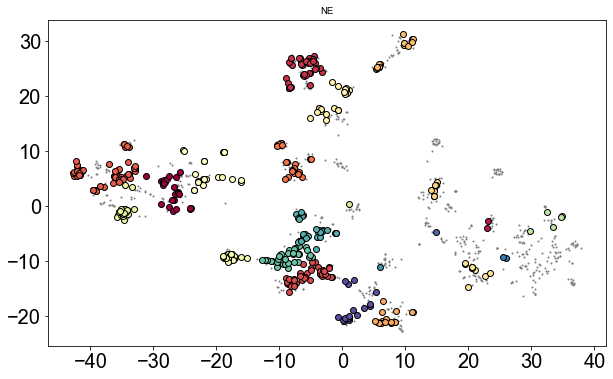

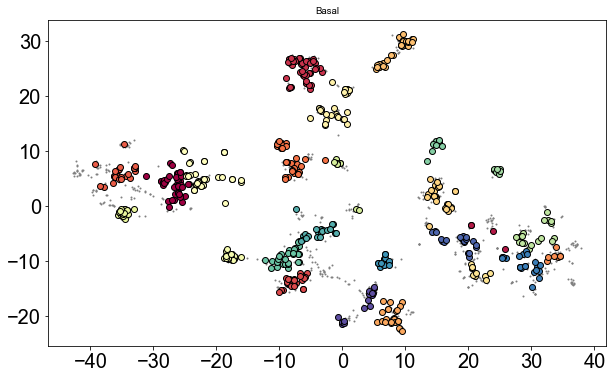

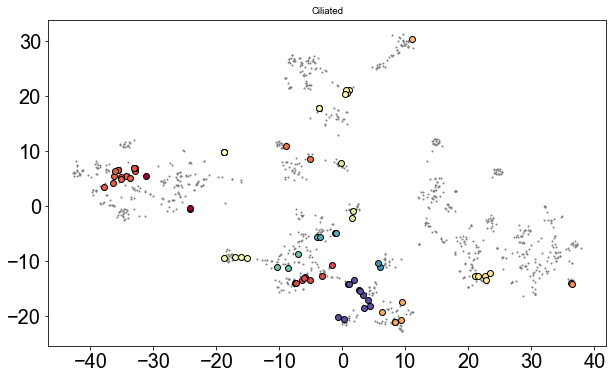

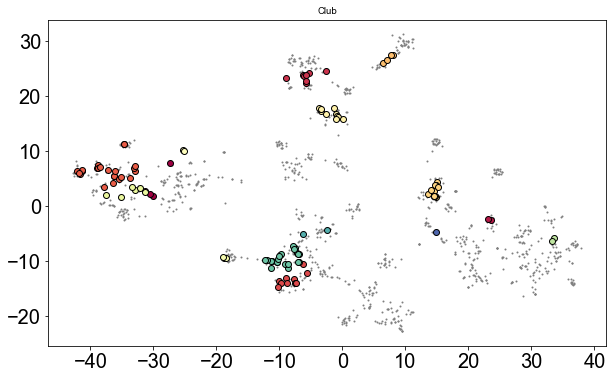

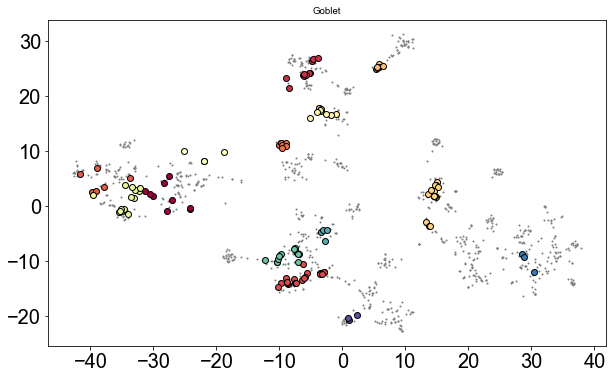

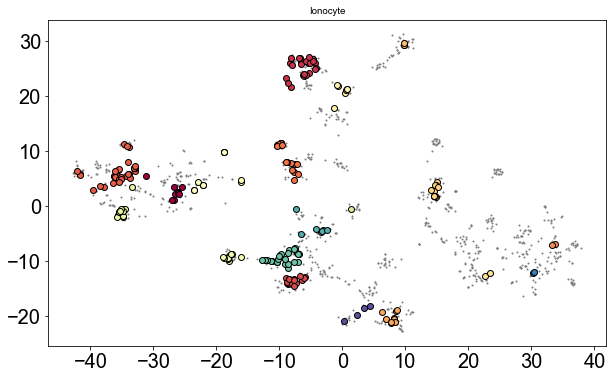

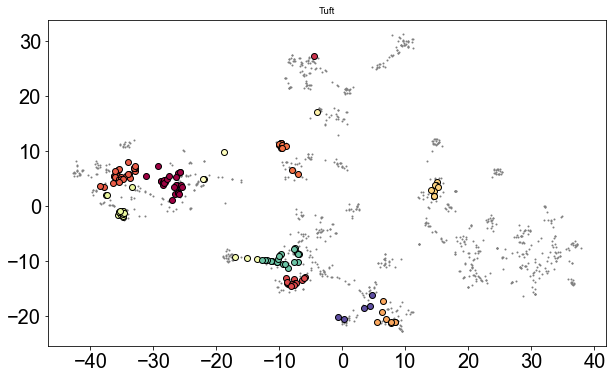

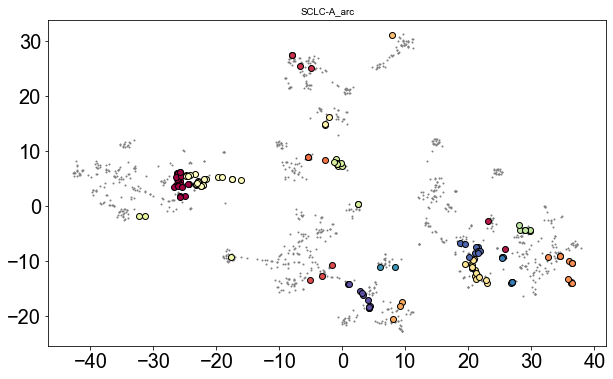

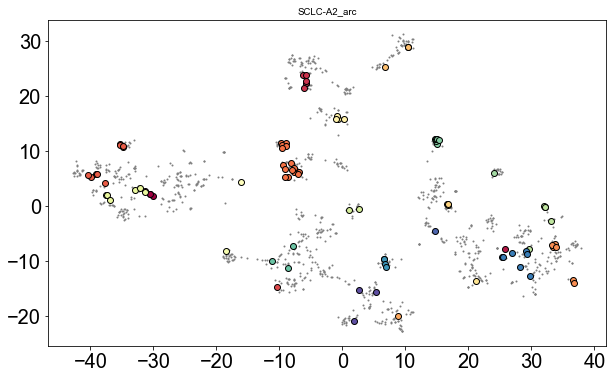

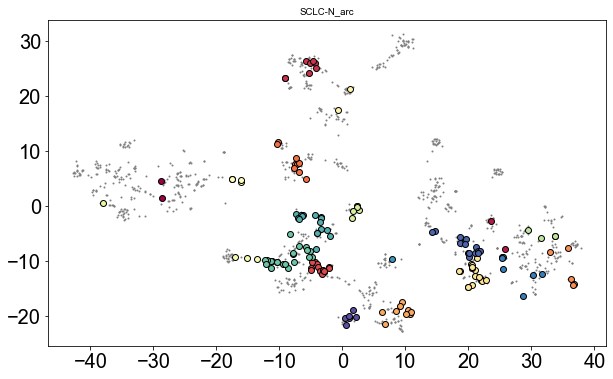

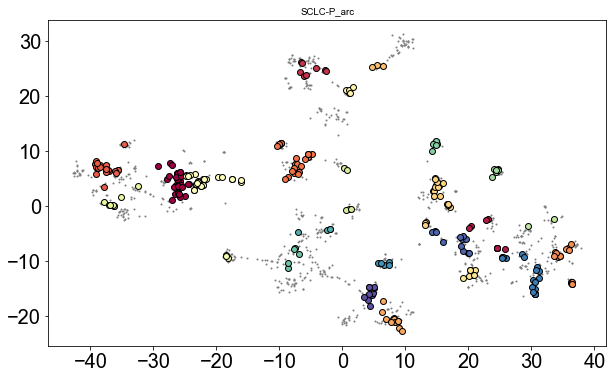

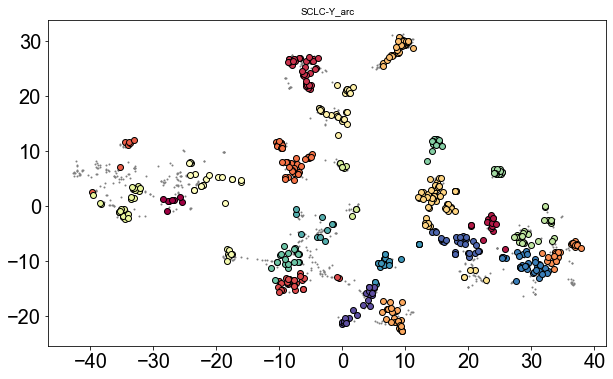

In [239]:
for s in subtypes:
    plt.figure(figsize = (10,6))
    tmp = ydf.loc[go_phenotypes[go_phenotypes[s] != 1].index]

#     sns.kdeplot(tmp.tsne1, tmp.tsne2, levels=20, fill=False)

    x = ydf['tsne1']
    y = ydf['tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor='grey',markeredgecolor = 'grey', markersize=1)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (tmp.kmeans == k)

        x = tmp.loc[class_member_mask,'tsne1']
        y = tmp.loc[class_member_mask,'tsne2']
    #     if k ==9:
    #         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
    #          markeredgecolor='k', markersize=12)
        plt.plot(x, y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    plt.title(s)
    plt.show()

# bounds = np.zeros((t.n_components,2))
# bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
# bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))


In [172]:
ydf['kmeans']=db.labels_

In [173]:
ydf['name'] = df.loc[ydf.index]['name']

In [174]:


cluster_dict = {0:"Transcription and translation",
                1: "Bone, limb, andaxon extension development",
                2: "Response to cytokines, ions, drugs, and growth factors",
                3:"Vesicles and transport (including synaptic vesicles)",
                4:"Biosynthesis and metabolism (lipid, alcohol, protein)",
                5:"Signaling in response to stimulus (including cell death)",
                6: "Embryonic development and morphogenesis",
                7:"Cell-cell junction, synapse organization, and ECM organization",
                8: "Response to external stimulus (virus, nutrients, bacteria)",
                9: "Immune system activation",
                10:"Neuronal and neural development, morphogenesis, and differentiation",
                11:"Stress response",
                12:"ROS-induced metabolic process and protein folding",
                13:"DNA binding and transporter activity",
                14:"Metabolism",
                15:'Cell cycle',
                16:"Angiogenesis, vasculogenesis, and cardiovascular system development",
                17:"Proliferation and division (including stem cell proliferation)",
                18:"Cell adhesion to substrate",
                19: "Secretion of neurotransmitters and hormones",
                20:"Signaling, transport, and homeostasis",
                21:"Actin organization and migration",
                22:"System development and epithelial cell differentiation (epithelium, eye, kidney, lung, skin)",
                23:"Mesoderm development and cytokine production \n (osteoblast differentiation, interferon and interleukin production, immune response)",
                24: "Vesicle fusion, mitochondrial and chromatin organization and membrane organization",
               }

In [175]:
# [print(i) for i in df.loc[ydf.loc[ydf['kmeans'] == 1].index]['name']]

In [176]:
subtypes = df.columns[:-4]
hm = pd.DataFrame(index=set(ydf['kmeans']), columns=subtypes)
for s in subtypes:
    ind, count = np.unique(ydf.loc[set(ydf.index).intersection(set(df[df[f'{s}']!=1].index))]['kmeans'],return_counts=True)
    for i, c in zip(ind,count):
        hm.loc[i,s] = c
        

In [177]:
hm = hm.fillna(0).T/np.unique(ydf['kmeans'], return_counts=True)[1]

In [178]:
hm.columns = [f"{i}: {cluster_dict[i]}" for i in hm.columns]


In [179]:
new_ind = []
for i in hm.index:
    if "_arc" in i:
        new_ind.append(i.split('_')[0])
    else:
        new_ind.append(i)
hm.index = new_ind
        

In [232]:
hm_ = (hm.T/hm.max(axis = 1)).T

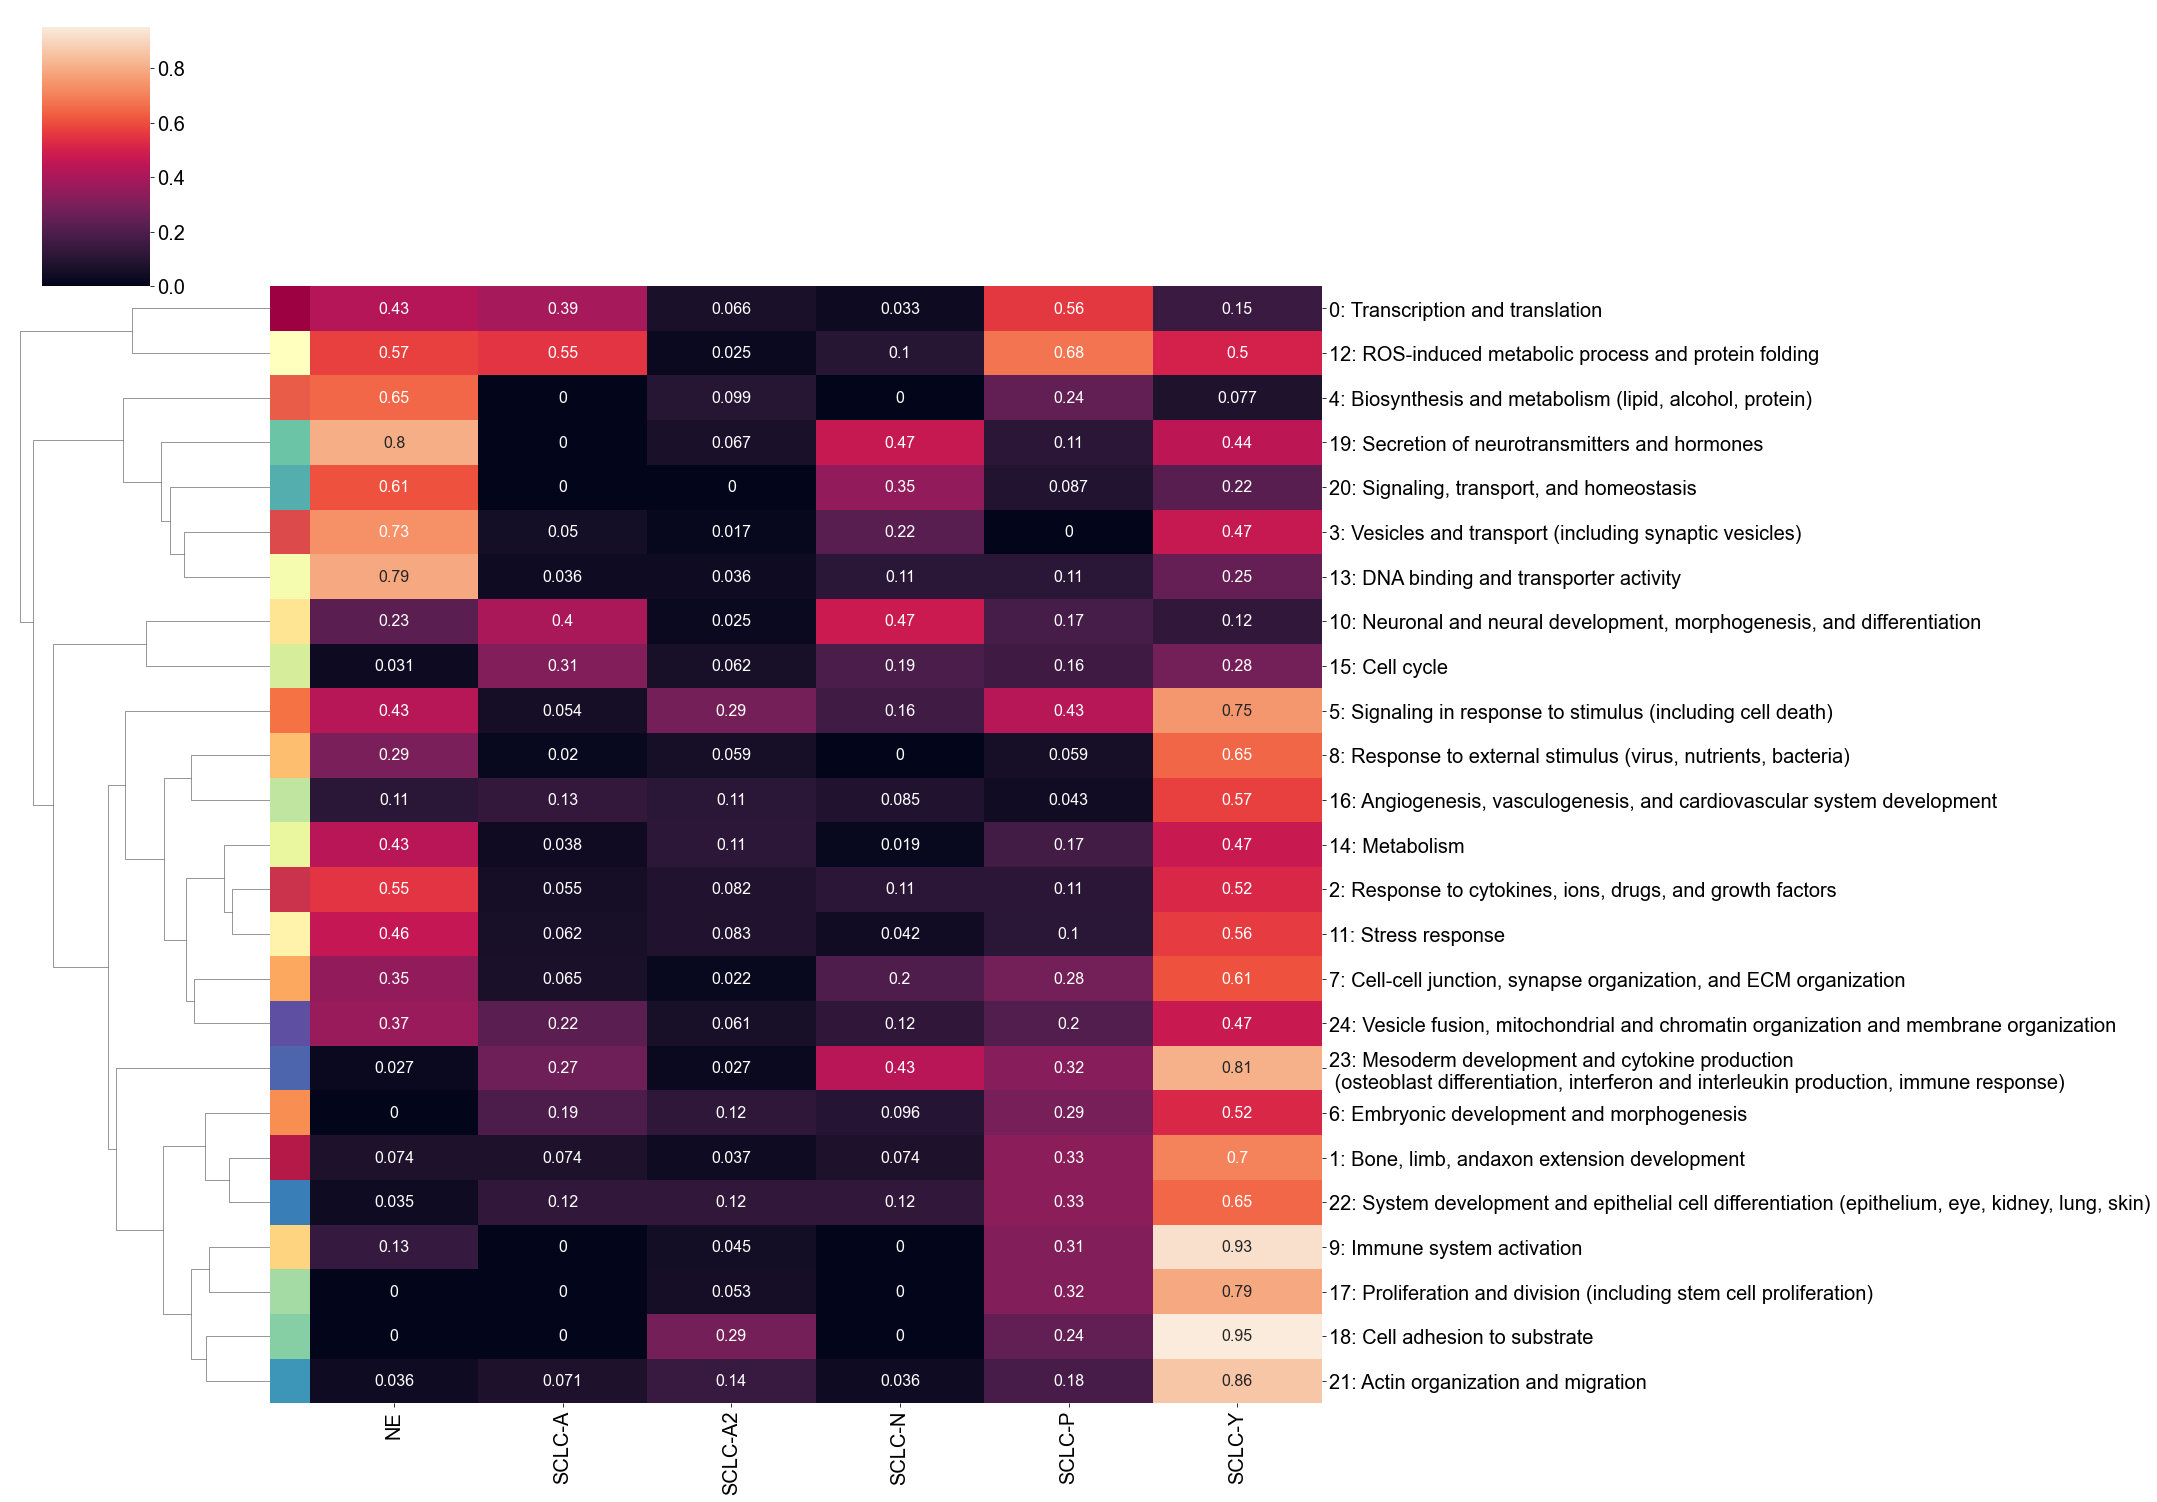

In [234]:


font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
b = sns.clustermap(hm.T[hm.index[[0,7,8,9,10,11]]], annot = True, col_cluster=False, row_cluster = True,figsize = (30,20), annot_kws = {'size':16}, row_colors=colors)
plt.setp(b.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig('./out/airway_sclc_clustermap.pdf')

In [ ]:
# plt.figure(figsize = (10,6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
    
    plt.text(x.mean(),y.mean(), hm[-5:].index[np.argmax(hm[-5:][k])], size = 10, backgroundcolor = 'w', color = 'k')

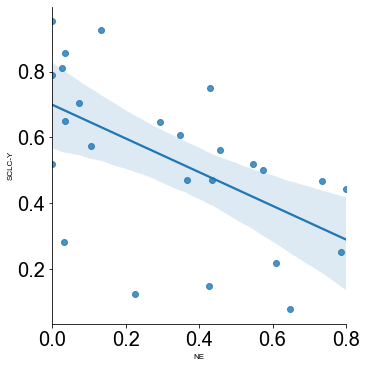

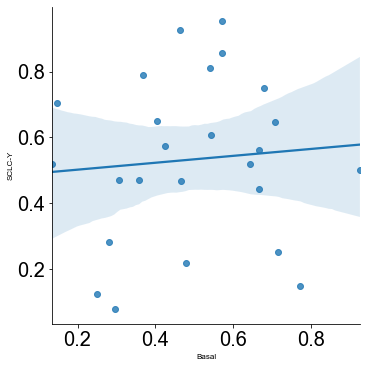

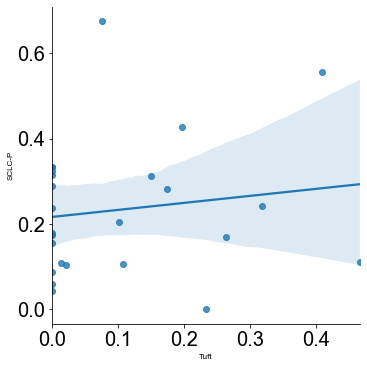

In [396]:
sns.lmplot(data = hm.T, x ='NE',y =  'SCLC-Y', )
sns.lmplot(data = hm.T, x ='Basal',y =  'SCLC-Y')
sns.lmplot(data = hm.T, x ='Tuft',y =  'SCLC-P')

In [399]:
[print(i) for i in ydf.loc[ydf['kmeans']==9]['name']]

cell activation
cytokine production
regulation of cytokine production
negative regulation of cytokine production
positive regulation of cytokine production
hematopoietic progenitor cell differentiation
immune effector process
cell activation involved in immune response
follicular dendritic cell activation
follicular dendritic cell differentiation
myeloid leukocyte activation
myeloid cell activation involved in immune response
lymphocyte activation involved in immune response
leukocyte activation involved in immune response
cytokine production involved in immune response
production of molecular mediator of immune response
leukocyte mediated immunity
myeloid leukocyte mediated immunity
neutrophil mediated immunity
adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains
antigen processing and presentation of peptide antigen via MHC class I
antigen processing and presentation of exogenous peptide antigen
immune system develo

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [77]:
dissim = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/dist_all_rel_dendrogram_pnec_sclc.csv",
                    index_col=0, header = 0)

In [78]:
len(set(dissim.index).intersection(set(NE_go)))

766

In [67]:
NE_go = list(df.loc[df['NE']==True].index)

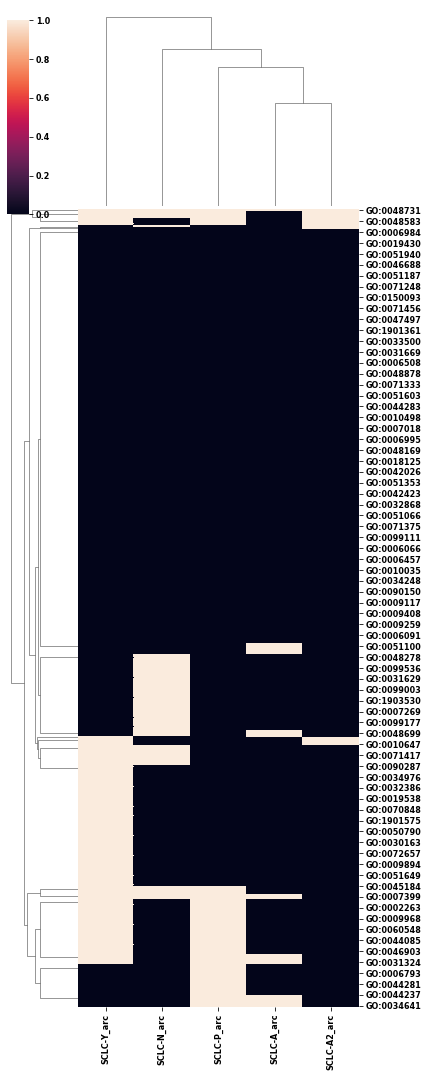

In [131]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
# only NE == True:
# dissim_NE=dissim.loc[NE_go][NE_go]
# linkage = hc.linkage(dissim_NE, method='average')
sns.clustermap(df.loc[NE_go][df.columns[7:-3]].astype('int'), figsize = (6,15))

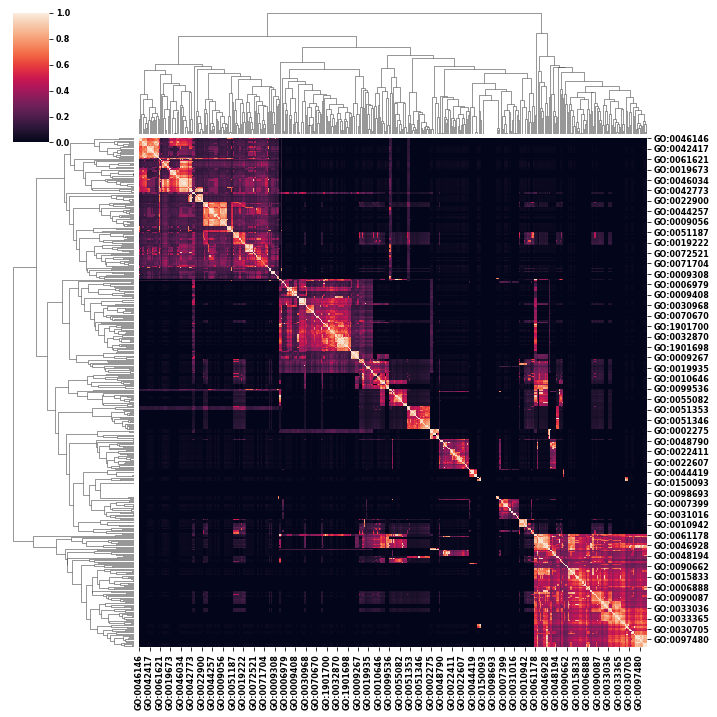

In [132]:
sns.clustermap(1-dissim.loc[NE_go][NE_go])

In [190]:
df.loc[NE_go].loc[df['SCLC-A_arc']!=1].sort_values('SCLC-A_arc').head(40)

NE   SCLC-A_arc SCLC-A2_arc   SCLC-N_arc   SCLC-P_arc  \
GO:0031323   0.00202779  4.00586e-09           1            1  7.06968e-07   
GO:0007399  9.28127e-05  1.03072e-08           1  9.20758e-11   0.00561002   
GO:0044271   0.00154339  1.32048e-07           1            1  3.64671e-06   
GO:0050789  0.000964464  1.40248e-07           1  2.91555e-06   0.00063895   
GO:0019222  0.000352191  2.96537e-07           1            1  4.38483e-06   
GO:0034641   7.7176e-06  7.43444e-06           1            1  1.03452e-06   
GO:0030182   0.00425068  1.27546e-05           1  2.42639e-06            1   
GO:0022008   0.00179173  1.54592e-05           1  1.91801e-06            1   
GO:0007017  0.000822899  1.60745e-05           1            1            1   
GO:0048699   0.00161619  4.47789e-05           1  2.47838e-06            1   
GO:1901576   0.00947739  5.32137e-05           1            1  5.96711e-09   
GO:0009890   0.00481833  0.000198563           1            1  0.000249342   
GO:0048523  5.65819e-05  0.000417533           1            1  1.10424e-06   
GO:0048519   2.7714e-06   0.00114448           1            1  3.69985e-06   
GO:0051640  1.29709e-05   0.00120275           1            1            1   
GO:0048731   0.00520221   0.00136985  0.00898387  5.79292e-07   0.00244024   
GO:0051172  1.92088e-06   0.00149026           1            1  1.13244e-05   
GO:0006996  1.66721e-06   0.00294054           1            1   0.00416289   
GO:0048522  0.000796721   0.00357025           1   0.00463194  1.57021e-06   
GO:0061387    0.0032838   0.00464011           1            1            1   
GO:0031324  4.05259e-07   0.00479973           1            1  2.06011e-05   
GO:0051100   0.00320599   0.00484579           1            1            1   
GO:0009893   0.00667448   0.00615111           1            1  3.37098e-06   
GO:0006928   0.00453884   0.00688329           1            1            1   
GO:0030705  9.15528e-05   0.00733492           1            1            1   
GO:0003357  0.000199018   0.00740603           1            1            1   

             SCLC-Y_arc ont  \
GO:0031323            1  BP   
GO:0007399   0.00172689  BP   
GO:0044271            1  BP   
GO:0050789  0.000266628  BP   
GO:0019222            1  BP   
GO:0034641            1  BP   
GO:0030182            1  BP   
GO:0022008            1  BP   
GO:0007017            1  BP   
GO:0048699            1  BP   
GO:1901576            1  BP   
GO:0009890   0.00955485  BP   
GO:0048523  2.94271e-07  BP   
GO:0048519  1.23254e-06  BP   
GO:0051640            1  BP   
GO:0048731  1.61611e-06  BP   
GO:0051172            1  BP   
GO:0006996   0.00138064  BP   
GO:0048522    1.742e-07  BP   
GO:0061387            1  BP   
GO:0031324    0.0081902  BP   
GO:0051100            1  BP   
GO:0009893  0.000493083  BP   
GO:0006928  3.19193e-10  BP   
GO:0030705            1  BP   
GO:0003357            1  BP   

                                                         name level  
GO:0031323           regulation of cellular metabolic process     4  
GO:0007399                         nervous system development     4  
GO:0044271    cellular nitrogen compound biosynthetic process     4  
GO:0050789                   regulation of biological process     2  
GO:0019222                    regulation of metabolic process     3  
GO:0034641       cellular nitrogen compound metabolic process     3  
GO:0030182                             neuron differentiation     4  
GO:0022008                                       neurogenesis     4  
GO:0007017                          microtubule-based process     2  
GO:0048699                              generation of neurons     5  
GO:1901576             organic substance biosynthetic process     3  
GO:0009890        negative regulation of biosynthetic process     5  
GO:0048523            negative regulation of cellular process     4  
GO:0048519          negative regulation of biological process     3  
GO:0051640                

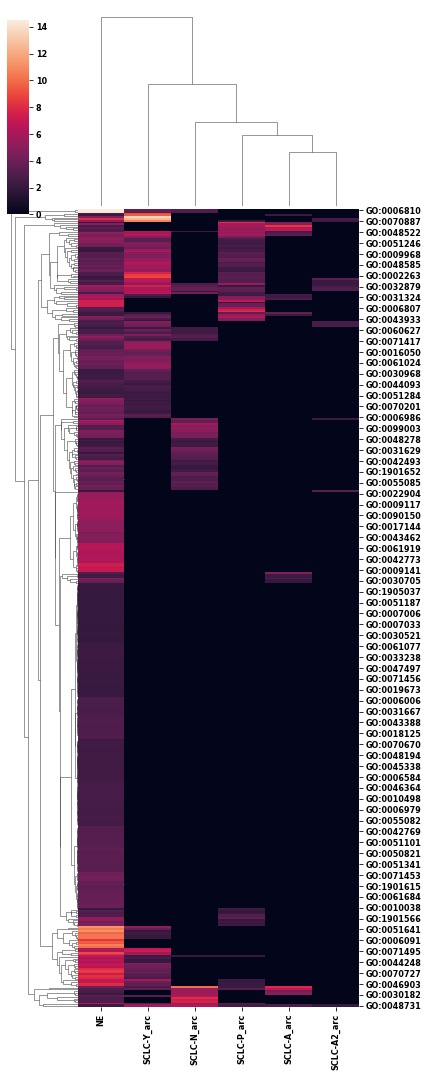

In [209]:
sns.clustermap(-np.log10((df.loc[NE_go][df.columns[:-3]]).astype(float)), figsize = (6,15))

# Using bulk SCLC data and averaged PNEC data with ssGSEA to generate GO term expression values

# Using bulk SCLC data and averaged PNEC data with rank ordered genes by overall expression

Uses GSEA Pre Ranked to give a list of genes (by expression value) as ranking weights

### PNEC rank ordered genes

In [216]:
ne_obs = airway_cluster[airway_cluster['cluster']=='Neuroendocrine'].index

In [224]:
ne_gene_ro = pd.Series(airway[airway.obs['cluster']=='Neuroendocrine'].X.mean(axis = 0), index = airway.var_names)

In [253]:
ne_gene_ro-ne_gene_ro.mean()

XKR4             -0.141385
GM1992           -0.141385
GM37381          -0.141385
RP1              -0.141385
SOX17            -0.141385
                    ...   
AC168977.1       -0.141385
PISD              0.171740
DHRSX             0.152885
VMN2R122         -0.141385
CAAA01147332.1   -0.141385
Length: 27716, dtype: float32

In [239]:
ne_gene_ro.to_csv('ne_genes_rank_ordered.txt',sep = '\t')

In [238]:
# [print(i) for i in ne_gene_ro.sort_values(ascending=False).head(100).index]

### SCLC Archetype rank ordered genes

In [243]:
arc = pd.read_csv(op.join(outdir, 'arc_space/arc_gene_space_no_lowgenes.csv'), header = None)
arc.columns = data.columns
arc = arc.T

In [245]:
arc.to_csv('archetypes_genes_rank_ordered.rnk', sep = '\t')

In [258]:
for i,p in zip(range(5), ['Y','P','N','A2','A']):
    arc[i].to_csv(f'{p}_genes_rank_ordered.rnk', sep = '\t')

### SCLC rank ordered genes by DEG by archetype

A1BG      A1CF       A2M     A2ML1    A4GALT      AAAS  \
m.DMS153   2.955199  0.077212  2.267502  0.011011  2.453512  4.693518   
m.NCIH60   3.239727  0.167166  0.122302 -0.007241  1.528297  5.889316   
m.NCIH69   3.599770  0.117398  0.085891 -0.005086  1.428711  6.002266   
m.NCIH82   3.055231  0.536179  1.586479 -0.004471  0.359365  5.981354   
m.NCIH128  4.579507  0.088160  0.064500 -0.003819  0.865621  5.222291   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  5.073359  0.242981  0.039852  0.114451  0.086832  5.282937   
c.SBC5     4.423783  0.008349  0.681201  0.043520  2.641161  6.101916   
c.SCLC21H  3.713345  0.003494  0.032354  0.004658  0.764500  5.704675   
c.SHP77    3.438644 -0.073834  1.635919  0.003820  0.861152  5.751452   
c.SW1271   4.209637 -0.001700  0.303402  0.031692  1.868799  6.244721   

               AACS     AADAC   AADACL2     AADAT  ...    ZWILCH     ZWINT  \
m.DMS153   5.604911  0.023528 -0.010271  2.941738  ...  3.939669  6.852976   
m.NCIH60   4.345321  0.050939 -0.022236  3.558743  ...  4.864912  5.796933   
m.NCIH69   4.460012  0.035774 -0.015616  3.888875  ...  4.786084  6.610108   
m.NCIH82   4.859381  0.031453 -0.013730  3.640416  ...  4.725295  5.369400   
m.NCIH128  5.884253  0.026864 -0.011727  3.003065  ...  4.081717  6.199033   
...             ...       ...       ...       ...  ...       ...       ...   
c.NCIH889  5.712913 -0.024057  0.010501  3.765605  ...  3.665540  6.054454   
c.SBC5     4.188138  0.008194  0.002690  2.398242  ...  4.227682  4.940176   
c.SCLC21H  5.191045  0.023815  0.014304  3.706236  ...  3.310412  5.770995   
c.SHP77    5.573440  0.029711  0.011731  3.539081  ...  4.972090  5.493339   
c.SW1271   3.885183  2.189045  0.038158  1.689162  ...  5.413040  7.036555   

               ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
m.DMS153   1.664986  2.541377  3.696684  2.157076  3.203573  0.487181   
m.NCIH60   2.122629  4.070915  3.737488  2.397393  3.531696  5.936393   
m.NCIH69   0.114373  0.134965  3.466131  1.863985  3.208492  3.744837   
m.NCIH82   1.575644  3.127523  3.856145  2.255620  3.311325  4.646812   
m.NCIH128  1.596850  2.570837  3.553932  2.100612  3.854498  1.620770   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  0.124721  2.026581  3.958561 -0.038552  3.535678  2.027946   
c.SBC5     1.863922  2.592759  3.522133  2.436774  2.542059  6.252048   
c.SCLC21H  0.798272  2.211449  3.864399  1.035032  2.938834  4.599310   
c.SHP77    1.537014  2.918387  3.081628 -0.138525  2.524447  5.381763   
c.SW1271   0.993272  2.262222  3.759904  1.419227  2.299398  6.788429   

              ZZEF1      ZZZ3  
m.DMS153   2.299240  4.944759  
m.NCIH60   3.690349  3.893902  
m.NCIH69   4.100225  4.095373  
m.NCIH82   4.140049  5.760181  
m.NCIH128  3.587906  4.814864  
...             ...       ...  
c.NCIH889  3.289557  4.905469  
c.SBC5     2.674662  3.574245  
c.SCLC21H  3.066311  4.852598  
c.SHP77    3.937478  3.831536  
c.SW1271   3.867651  4.254026  

[120 rows x 15950 columns]

In [248]:
distances = pd.read_csv(op.join(outdir,"arc_space/distances.csv"), header = None).T
distances.columns = ['SCLC-Y', 'SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
distances.head()

SCLC-Y      SCLC-P     SCLC-N     SCLC-A2     SCLC-A
0  122.034899  107.833082  91.214260   93.282333  76.338367
1  122.334497  108.867795  95.302842  101.101440  77.636464
2  129.333514  112.065962  96.835822  101.923496  81.288051
3  129.561391  120.786395  98.340963  103.160870  83.854943
4  133.735308  122.521452  98.476548  103.607238  85.915890

In [249]:
clines = pd.read_csv(op.join(outdir,"arc_space/combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)
clines

source subtype NEW_10_2020 10_08_2020
c.COLO668   CCLE      A2          A2         A2
c.CORL24    CCLE       A           N          A
c.CORL279   CCLE       A           A          A
c.CORL311   CCLE       P           P          P
c.CORL47    CCLE       A           A          A
...          ...     ...         ...        ...
m.NCIH82   Minna       N           N       uncl
m.NCIH841  Minna       Y           Y          Y
m.NCIH865  Minna      A2          A2         A2
m.NCIH889  Minna       A           A          A
m.SHP77    Minna      A2          A2         A2

[120 rows x 4 columns]

In [251]:
ordering = pd.read_csv(op.join(outdir,"arc_space/ordering.csv"), header = None).T


In [252]:
#change from MATLAB to python indexing
ordering = ordering-1

In [253]:
for c in ordering:
    ordering[f"order_{c}"] = clines.index[list(ordering[c])]

In [254]:
ordering.columns = [0,1,2,3,4, 'SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

In [255]:
ordering

0    1    2    3   4      SCLC-Y      SCLC-P      SCLC-N     SCLC-A2  \
0     37   33   54   50  90  c.NCIH2286   c.NCIH211   m.HCC4001    m.DMS153   
1     49   91  105   63  82    c.SW1271   m.NCIH211   m.NCIH524  m.NCIH1238   
2     18  106  107    8  71  c.NCIH1339   m.NCIH526    m.NCIH60    c.DMS153   
3     44   41   40  114  74   c.NCIH841   c.NCIH526   c.NCIH524   m.NCIH774   
4    116   60   59   29  89   m.NCIH841  m.NCIH1048    m.HCC970  c.NCIH2029   
..   ...  ...  ...  ...  ..         ...         ...         ...         ...   
115    4    1   49   37  46    c.CORL47    c.CORL24    c.SW1271  c.NCIH2286   
116   13   36   18    7  49     c.HCC33  c.NCIH2227  c.NCIH1339    c.DMS114   
117   15   12   75   49  37  c.NCIH1092     c.DMS79  m.NCIH1688    c.SW1271   
118   21   35   11   18  18   c.NCIH146  c.NCIH2196     c.DMS53  c.NCIH1339   
119   42   27   27   27  27    c.NCIH69   c.NCIH196   c.NCIH196   c.NCIH196   

         SCLC-A  
0    m.NCIH2108  
1    m.NCIH1926  
2    m.NCIH1522  
3    m.NCIH1672  
4    m.NCIH2107  
..          ...  
115      c.SBC5  
116    c.SW1271  
117  c.NCIH2286  
118  c.NCIH1339  
119   c.NCIH196  

[120 rows x 10 columns]

In [256]:
data = pd.read_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T

In [257]:
data

A1BG      A1CF       A2M     A2ML1    A4GALT      AAAS  \
m.DMS153   2.955199  0.077212  2.267502  0.011011  2.453512  4.693518   
m.NCIH60   3.239727  0.167166  0.122302 -0.007241  1.528297  5.889316   
m.NCIH69   3.599770  0.117398  0.085891 -0.005086  1.428711  6.002266   
m.NCIH82   3.055231  0.536179  1.586479 -0.004471  0.359365  5.981354   
m.NCIH128  4.579507  0.088160  0.064500 -0.003819  0.865621  5.222291   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  5.073359  0.242981  0.039852  0.114451  0.086832  5.282937   
c.SBC5     4.423783  0.008349  0.681201  0.043520  2.641161  6.101916   
c.SCLC21H  3.713345  0.003494  0.032354  0.004658  0.764500  5.704675   
c.SHP77    3.438644 -0.073834  1.635919  0.003820  0.861152  5.751452   
c.SW1271   4.209637 -0.001700  0.303402  0.031692  1.868799  6.244721   

               AACS     AADAC   AADACL2     AADAT  ...    ZWILCH     ZWINT  \
m.DMS153   5.604911  0.023528 -0.010271  2.941738  ...  3.939669  6.852976   
m.NCIH60   4.345321  0.050939 -0.022236  3.558743  ...  4.864912  5.796933   
m.NCIH69   4.460012  0.035774 -0.015616  3.888875  ...  4.786084  6.610108   
m.NCIH82   4.859381  0.031453 -0.013730  3.640416  ...  4.725295  5.369400   
m.NCIH128  5.884253  0.026864 -0.011727  3.003065  ...  4.081717  6.199033   
...             ...       ...       ...       ...  ...       ...       ...   
c.NCIH889  5.712913 -0.024057  0.010501  3.765605  ...  3.665540  6.054454   
c.SBC5     4.188138  0.008194  0.002690  2.398242  ...  4.227682  4.940176   
c.SCLC21H  5.191045  0.023815  0.014304  3.706236  ...  3.310412  5.770995   
c.SHP77    5.573440  0.029711  0.011731  3.539081  ...  4.972090  5.493339   
c.SW1271   3.885183  2.189045  0.038158  1.689162  ...  5.413040  7.036555   

               ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
m.DMS153   1.664986  2.541377  3.696684  2.157076  3.203573  0.487181   
m.NCIH60   2.122629  4.070915  3.737488  2.397393  3.531696  5.936393   
m.NCIH69   0.114373  0.134965  3.466131  1.863985  3.208492  3.744837   
m.NCIH82   1.575644  3.127523  3.856145  2.255620  3.311325  4.646812   
m.NCIH128  1.596850  2.570837  3.553932  2.100612  3.854498  1.620770   
...             ...       ...       ...       ...       ...       ...   
c.NCIH889  0.124721  2.026581  3.958561 -0.038552  3.535678  2.027946   
c.SBC5     1.863922  2.592759  3.522133  2.436774  2.542059  6.252048   
c.SCLC21H  0.798272  2.211449  3.864399  1.035032  2.938834  4.599310   
c.SHP77    1.537014  2.918387  3.081628 -0.138525  2.524447  5.381763   
c.SW1271   0.993272  2.262222  3.759904  1.419227  2.299398  6.788429   

              ZZEF1      ZZZ3  
m.DMS153   2.299240  4.944759  
m.NCIH60   3.690349  3.893902  
m.NCIH69   4.100225  4.095373  
m.NCIH82   4.140049  5.760181  
m.NCIH128  3.587906  4.814864  
...             ...       ...  
c.NCIH889  3.289557  4.905469  
c.SBC5     2.674662  3.574245  
c.SCLC21H  3.066311  4.852598  
c.SHP77    3.937478  3.831536  
c.SW1271   3.867651  4.254026  

[120 rows x 15950 columns]

In [258]:
data.T.groupby(data.T.index).mean().to_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'))

In [259]:
for c in distances:
    x = distances[c]
    x.index = ordering[c].values
    distances[c] = x.sort_index().values

In [260]:
distances.index = clines.index
distances

SCLC-Y      SCLC-P      SCLC-N     SCLC-A2      SCLC-A
c.COLO668  219.711613  163.151579  190.111824  108.962738  168.018820
c.CORL24   222.904409  194.007225  147.307784  179.723460  145.958027
c.CORL279  222.164942  182.309984  134.033402  139.243882  142.255942
c.CORL311  221.129705  129.052134  156.731679  170.742741  162.306829
c.CORL47   230.207672  176.544479  139.077497  132.215445  122.241732
...               ...         ...         ...         ...         ...
m.NCIH82   178.272571  145.130066  152.464232  181.332542  182.733808
m.NCIH841  133.735308  153.785497  164.982512  184.115992  172.668874
m.NCIH865  218.759175  172.318074  155.138404  110.047582  118.345959
m.NCIH889  227.591517  172.539896  147.775717  115.848873  131.181902
m.SHP77    196.512272  170.907722  160.243839  123.807853  169.577730

[120 rows x 5 columns]

In [340]:
closest_bins = pd.DataFrame(['']*len(distances.index), columns=['arc'],index = distances.index)

In [387]:
for s in distances.columns:
    tmp = distances.sort_values(s)
    for i in tmp[0:12].index:
        closest_bins.loc[i]['arc'] = s

## Using single cell data and upregulated genes from rank_genes_groups